# Global Nutrition Adult and Adolescent Dataset

This 2021 Global Nutrition Report dataset contains information on adult and adolescent nutrition, economics and demography, in the nutrition sector.

It contains geographic information, indicator data and a number of other fields. The field `disaggregation` indicates the type of disaggregation available (e.g. gender). The field `disagg.value` specifies the component of that type of disaggregation (e.g. male or female). The `value.type` field details which regional and world data values are based on weighted means, which are sums and which are modelled estimates.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
from scipy.stats import chi2_contingency
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
od.download(
    'https://www.kaggle.com/datasets/amohankumar/global-nutrition-adult-and-adolescent-dataset/data'
)

Skipping, found downloaded files in "./global-nutrition-adult-and-adolescent-dataset" (use force=True to force download)


In [3]:
country_adolescent = pd.read_csv('global-nutrition-adult-and-adolescent-dataset/Country Adolescent.csv')
country_adult = pd.read_csv('global-nutrition-adult-and-adolescent-dataset/Country Adult.csv')
country_determinants = pd.read_csv('global-nutrition-adult-and-adolescent-dataset/Country Determinants.csv')
country_diet = pd.read_csv('global-nutrition-adult-and-adolescent-dataset/Country Dietary Needs.csv')
country_intervention = pd.read_csv('global-nutrition-adult-and-adolescent-dataset/Country Intervention.csv')
region_adolescent = pd.read_csv('global-nutrition-adult-and-adolescent-dataset/Region Adolescent.csv')
region_adult = pd.read_csv('global-nutrition-adult-and-adolescent-dataset/Region Adult.csv')
region_diet = pd.read_csv('global-nutrition-adult-and-adolescent-dataset/Region Dietary Needs.csv')

**Preview Dataset**

In [4]:
print(country_adolescent.shape)
country_adolescent.head()

(762, 61)


,iso3,country,disaggregation,disagg.value,region,subregion,section,adolescent_obesity_2000,adolescent_obesity_2001,adolescent_obesity_2002,...,adolescent_thinness_2008,adolescent_thinness_2009,adolescent_thinness_2010,adolescent_thinness_2011,adolescent_thinness_2012,adolescent_thinness_2013,adolescent_thinness_2014,adolescent_thinness_2015,adolescent_thinness_2016,adolescent_thinness_2019
0,AFG,Afghanistan,sex,Boys,Asia,Southern Asia,Child and adolescent (aged 5-19) nutrition status,0.67,0.74,0.82,...,25.31,25.05,24.78,24.50,24.22,23.93,23.64,23.35,23.05,NaN
1,AFG,Afghanistan,sex,Boys Projection,Asia,Southern Asia,Child and adolescent (aged 5-19) nutrition status,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.05,22.13
2,AFG,Afghanistan,sex,Girls,Asia,Southern Asia,Child and adolescent (aged 5-19) nutrition status,0.53,0.59,0.67,...,12.02,11.88,11.74,11.61,11.47,11.33,11.19,11.05,10.92,NaN
3,AFG,Afghanistan,sex,Girls Projection,Asia,Southern Asia,Child and adolescent (aged 5-19) nutrition status,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.92,10.50
4,AGO,Angola,sex,Boys,Africa,Middle Africa,Child and adolescent (aged 5-19) nutrition status,0.25,0.29,0.33,...,13.15,12.89,12.63,12.38,12.12,11.88,11.64,11.42,11.20,NaN


In [5]:
print(country_adult.shape)
country_adult.head()

(4268, 128)


,iso3,country,disaggregation,disagg.value,region,subregion,section,adult_obesity_2000,adult_obesity_2001,adult_obesity_2002,...,Risk_factor_legumes_2018,Risk_factor_nuts_seeds_2018,Risk_factor_whole_grains_2018,Risk_factor_prc_meat_2018,Risk_factor_red_meat_2018,Risk_factor_SSBs_2018,Risk_factor_weight_2018,Risk_factor_underweight_2018,Risk_factor_overweight_2018,Risk_factor_obese_2018
0,AFG,Afghanistan,all,Overweight alone,Asia,Southern Asia,Adult nutrition,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,all,NaN,Asia,Southern Asia,Adult nutrition,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Cause,all-c,Asia,Southern Asia,Adult nutrition,NaN,NaN,NaN,...,NaN,NaN,7273.0,232.0,357.0,1072.0,11253.0,4153.0,3029.0,4071.0
3,AFG,Afghanistan,Cause,Cancer,Asia,Southern Asia,Adult nutrition,NaN,NaN,NaN,...,NaN,NaN,1744.0,3.0,6.0,NaN,1139.0,322.0,361.0,456.0
4,AFG,Afghanistan,Cause,CHD,Asia,Southern Asia,Adult nutrition,NaN,NaN,NaN,...,NaN,NaN,5529.0,164.0,243.0,889.0,5182.0,957.0,1933.0,2292.0


In [6]:
print(country_determinants.shape)
country_determinants.head()

(194, 320)


,iso3,country,disaggregation,disagg.value,region,subregion,section,surface_water_2000,surface_water_2001,surface_water_2002,...,female_secondary_enroll_net_2010,female_secondary_enroll_net_2011,female_secondary_enroll_net_2012,female_secondary_enroll_net_2013,female_secondary_enroll_net_2014,female_secondary_enroll_net_2015,female_secondary_enroll_net_2016,female_secondary_enroll_net_2017,female_secondary_enroll_net_2018,female_secondary_enroll_net_2019
0,AFG,Afghanistan,all,NaN,Asia,Southern Asia,Underlying determinants,24.99,24.97,24.12,...,NaN,NaN,NaN,33.78,30.95,30.45,28.74,29.99,31.31,NaN
1,AGO,Angola,all,NaN,Africa,Middle Africa,Underlying determinants,28.70,28.08,27.47,...,14.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,Albania,all,NaN,Europe,Southern Europe,Underlying determinants,0.92,0.85,0.77,...,NaN,NaN,NaN,82.27,84.22,84.30,85.18,87.27,85.32,85.15
3,AND,Andorra,all,NaN,Europe,Southern Europe,Underlying determinants,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,all,NaN,Asia,Western Asia,Underlying determinants,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,82.92,81.04,NaN,NaN


In [7]:
print(country_diet.shape)
country_diet.head()

(193, 15)


,iso3,country,region,subregion,disaggregation,disagg.value,section,Fruit,Vegetables,Legumes,Nuts,Whole grains,Fish,Dairy,Red meat
0,AFG,Afghanistan,Asia,Southern Asia,location,National,Dietary needs,65.7,98.1,103.8,31.2,41.5,3.2,91.1,10.7
1,AGO,Angola,Africa,Middle Africa,location,National,Dietary needs,119.7,308.8,37.8,11.6,57.6,38.0,65.8,16.8
2,ALB,Albania,Europe,Southern Europe,location,National,Dietary needs,138.9,129.1,40.2,12.3,31.2,18.3,404.9,61.6
3,AND,Andorra,Europe,Southern Europe,location,National,Dietary needs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Asia,Western Asia,location,National,Dietary needs,107.6,123.3,40.6,31.7,37.2,40.5,428.4,29.6


In [8]:
print(country_intervention.shape)
country_intervention.head()

(1793, 97)


,iso3,country,disaggregation,disagg.value,region,subregion,section,diarrhea_zinc_2005,diarrhea_zinc_2006,diarrhea_zinc_2007,...,iodised_salt_2009,iodised_salt_2010,iodised_salt_2011,iodised_salt_2012,iodised_salt_2013,iodised_salt_2014,iodised_salt_2015,iodised_salt_2016,iodised_salt_2017,iodised_salt_2018
0,AFG,Afghanistan,education,Higher,Asia,Southern Asia,Intervention coverage,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,education,None,Asia,Southern Asia,Intervention coverage,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,education,Primary,Asia,Southern Asia,Intervention coverage,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,education,Secondary,Asia,Southern Asia,Intervention coverage,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,education,Secondary or higher,Asia,Southern Asia,Intervention coverage,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(region_adolescent.shape)
region_adolescent.head()

(116, 58)


,region,disaggregation,disagg.value,section,adolescent_obesity_2000,adolescent_obesity_2001,adolescent_obesity_2002,adolescent_obesity_2003,adolescent_obesity_2004,adolescent_obesity_2005,...,adolescent_thinness_2008,adolescent_thinness_2009,adolescent_thinness_2010,adolescent_thinness_2011,adolescent_thinness_2012,adolescent_thinness_2013,adolescent_thinness_2014,adolescent_thinness_2015,adolescent_thinness_2016,adolescent_thinness_2019
0,Africa,sex,Boys,Child and adolescent (aged 5-19) nutrition status,1.36,1.44,1.52,1.60,1.69,1.77,...,11.56,11.31,11.06,10.82,10.58,10.35,10.12,9.91,9.70,NaN
1,Africa,sex,Boys Projection,Child and adolescent (aged 5-19) nutrition status,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.12
2,Africa,sex,Girls,Child and adolescent (aged 5-19) nutrition status,1.93,2.05,2.18,2.31,2.45,2.59,...,5.71,5.60,5.50,5.40,5.31,5.22,5.13,5.05,4.98,NaN
3,Africa,sex,Girls Projection,Child and adolescent (aged 5-19) nutrition status,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.78
4,Asia,sex,Boys,Child and adolescent (aged 5-19) nutrition status,2.02,2.21,2.41,2.64,2.89,3.16,...,17.90,17.91,17.88,17.83,17.74,17.62,17.49,17.34,17.18,NaN


In [10]:
print(region_adult.shape)
region_adult.head()

(427, 125)


,region,disaggregation,disagg.value,section,adult_obesity_2000,adult_obesity_2001,adult_obesity_2002,adult_obesity_2003,adult_obesity_2004,adult_obesity_2005,...,Risk_factor_legumes_2018,Risk_factor_nuts_seeds_2018,Risk_factor_whole_grains_2018,Risk_factor_prc_meat_2018,Risk_factor_red_meat_2018,Risk_factor_SSBs_2018,Risk_factor_weight_2018,Risk_factor_underweight_2018,Risk_factor_overweight_2018,Risk_factor_obese_2018
0,Africa,all,NaN,Adult nutrition,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,Cause,all-c,Adult nutrition,NaN,NaN,NaN,NaN,NaN,NaN,...,120446.0,82118.0,173115.0,36132.0,76826.0,76442.0,449022.0,66196.0,93096.0,289730.0
2,Africa,Cause,Cancer,Adult nutrition,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,48206.0,844.0,2293.0,NaN,58105.0,5353.0,13616.0,39136.0
3,Africa,Cause,CHD,Adult nutrition,NaN,NaN,NaN,NaN,NaN,NaN,...,120446.0,82118.0,124908.0,19751.0,36401.0,51581.0,194640.0,8702.0,50586.0,135352.0
4,Africa,Cause,Resp_Dis,Adult nutrition,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41362.0,32969.0,-4132.0,12524.0


In [11]:
print(region_diet.shape)
region_diet.head()

(30, 12)


,region,disaggregation,disagg.value,section,Fruit,Vegetables,Legumes,Nuts,Wholegrains,Fish,Dairy,Red meat
0,Africa,location,Regional,Dietary needs,67.7,138.7,25.0,10.2,56.5,29.7,93.9,25.3
1,Asia,location,Regional,Dietary needs,69.7,208.0,25.6,7.2,52.8,29.2,121.4,49.3
2,Australia and New Zealand,location,Sub-regional,Dietary needs,135.2,118.7,29.0,6.5,64.6,28.5,714.3,60.7
3,Caribbean,location,Sub-regional,Dietary needs,115.6,103.2,31.0,2.8,26.4,18.4,195.1,62.4
4,Central America,location,Sub-regional,Dietary needs,137.2,173.3,40.7,2.8,10.9,10.6,325.4,49.8


### Data Cleaning

**Country Adolescent Dataframe**

Check count of missing values in all columns:

In [12]:
for col in country_adolescent.columns:
    print(f'{col}: {country_adolescent[col].isnull().sum()}')

iso3: 0
country: 0
disaggregation: 0
disagg.value: 0
region: 0
subregion: 0
section: 0
adolescent_obesity_2000: 382
adolescent_obesity_2001: 382
adolescent_obesity_2002: 382
adolescent_obesity_2003: 382
adolescent_obesity_2004: 382
adolescent_obesity_2005: 382
adolescent_obesity_2006: 382
adolescent_obesity_2007: 382
adolescent_obesity_2008: 382
adolescent_obesity_2009: 382
adolescent_obesity_2010: 382
adolescent_obesity_2011: 382
adolescent_obesity_2012: 382
adolescent_obesity_2013: 382
adolescent_obesity_2014: 382
adolescent_obesity_2015: 382
adolescent_obesity_2016: 382
adolescent_obesity_2019: 382
adolescent_overweight_2000: 382
adolescent_overweight_2001: 382
adolescent_overweight_2002: 382
adolescent_overweight_2003: 382
adolescent_overweight_2004: 382
adolescent_overweight_2005: 382
adolescent_overweight_2006: 382
adolescent_overweight_2007: 382
adolescent_overweight_2008: 382
adolescent_overweight_2009: 382
adolescent_overweight_2010: 382
adolescent_overweight_2011: 382
adolesc

The missing values seem to represent projections for 2016 and 2019 adolescent obesity, adolescent overweight, and adolescent thinness:

In [13]:
country_adolescent.loc[country_adolescent.adolescent_obesity_2000.isnull()].head()

,iso3,country,disaggregation,disagg.value,region,subregion,section,adolescent_obesity_2000,adolescent_obesity_2001,adolescent_obesity_2002,...,adolescent_thinness_2008,adolescent_thinness_2009,adolescent_thinness_2010,adolescent_thinness_2011,adolescent_thinness_2012,adolescent_thinness_2013,adolescent_thinness_2014,adolescent_thinness_2015,adolescent_thinness_2016,adolescent_thinness_2019
1,AFG,Afghanistan,sex,Boys Projection,Asia,Southern Asia,Child and adolescent (aged 5-19) nutrition status,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.05,22.13
3,AFG,Afghanistan,sex,Girls Projection,Asia,Southern Asia,Child and adolescent (aged 5-19) nutrition status,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.92,10.50
5,AGO,Angola,sex,Boys Projection,Africa,Middle Africa,Child and adolescent (aged 5-19) nutrition status,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.20,10.57
7,AGO,Angola,sex,Girls Projection,Africa,Middle Africa,Child and adolescent (aged 5-19) nutrition status,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.18,4.99
9,ALB,Albania,sex,Boys Projection,Europe,Southern Europe,Child and adolescent (aged 5-19) nutrition status,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.12,1.01


When we review the non-missing values, this confirms our position:

In [14]:
country_adolescent.loc[~country_adolescent.adolescent_obesity_2000.isnull()].head()

,iso3,country,disaggregation,disagg.value,region,subregion,section,adolescent_obesity_2000,adolescent_obesity_2001,adolescent_obesity_2002,...,adolescent_thinness_2008,adolescent_thinness_2009,adolescent_thinness_2010,adolescent_thinness_2011,adolescent_thinness_2012,adolescent_thinness_2013,adolescent_thinness_2014,adolescent_thinness_2015,adolescent_thinness_2016,adolescent_thinness_2019
0,AFG,Afghanistan,sex,Boys,Asia,Southern Asia,Child and adolescent (aged 5-19) nutrition status,0.67,0.74,0.82,...,25.31,25.05,24.78,24.50,24.22,23.93,23.64,23.35,23.05,NaN
2,AFG,Afghanistan,sex,Girls,Asia,Southern Asia,Child and adolescent (aged 5-19) nutrition status,0.53,0.59,0.67,...,12.02,11.88,11.74,11.61,11.47,11.33,11.19,11.05,10.92,NaN
4,AGO,Angola,sex,Boys,Africa,Middle Africa,Child and adolescent (aged 5-19) nutrition status,0.25,0.29,0.33,...,13.15,12.89,12.63,12.38,12.12,11.88,11.64,11.42,11.20,NaN
6,AGO,Angola,sex,Girls,Africa,Middle Africa,Child and adolescent (aged 5-19) nutrition status,0.67,0.75,0.83,...,5.89,5.78,5.68,5.58,5.49,5.40,5.32,5.25,5.18,NaN
8,ALB,Albania,sex,Boys,Europe,Southern Europe,Child and adolescent (aged 5-19) nutrition status,2.58,2.83,3.11,...,1.58,1.51,1.44,1.38,1.32,1.26,1.21,1.16,1.12,NaN


Check missing values for non-projections:

In [15]:
for col in country_adolescent.columns:
    print(f'{col}: {country_adolescent.loc[~country_adolescent["disagg.value"].str.contains("Projection"), col].isnull().sum()}')


iso3: 0
country: 0
disaggregation: 0
disagg.value: 0
region: 0
subregion: 0
section: 0
adolescent_obesity_2000: 2
adolescent_obesity_2001: 2
adolescent_obesity_2002: 2
adolescent_obesity_2003: 2
adolescent_obesity_2004: 2
adolescent_obesity_2005: 2
adolescent_obesity_2006: 2
adolescent_obesity_2007: 2
adolescent_obesity_2008: 2
adolescent_obesity_2009: 2
adolescent_obesity_2010: 2
adolescent_obesity_2011: 2
adolescent_obesity_2012: 2
adolescent_obesity_2013: 2
adolescent_obesity_2014: 2
adolescent_obesity_2015: 2
adolescent_obesity_2016: 2
adolescent_obesity_2019: 382
adolescent_overweight_2000: 2
adolescent_overweight_2001: 2
adolescent_overweight_2002: 2
adolescent_overweight_2003: 2
adolescent_overweight_2004: 2
adolescent_overweight_2005: 2
adolescent_overweight_2006: 2
adolescent_overweight_2007: 2
adolescent_overweight_2008: 2
adolescent_overweight_2009: 2
adolescent_overweight_2010: 2
adolescent_overweight_2011: 2
adolescent_overweight_2012: 2
adolescent_overweight_2013: 2
adole

There are no obesity, thinness and overweight values for 2019. South Sudan has no values across all features. 

We'll move the projection values into a new df called projections and replace South Sudan values with 0, reflecting no values. 

In [16]:
country_adolescent_projections = country_adolescent.loc[country_adolescent["disagg.value"].str.contains("Projection")]

country_adolescent = country_adolescent.loc[~country_adolescent["disagg.value"].str.contains("Projection")]

In [17]:
columns = list(country_adolescent.columns)
country_adolescent.loc[624:625, columns] = country_adolescent.loc[624:625, columns].fillna(0)

In [18]:
for col in country_adolescent.columns:
    print(f'{col}: {country_adolescent[col].isnull().sum()}')

iso3: 0
country: 0
disaggregation: 0
disagg.value: 0
region: 0
subregion: 0
section: 0
adolescent_obesity_2000: 0
adolescent_obesity_2001: 0
adolescent_obesity_2002: 0
adolescent_obesity_2003: 0
adolescent_obesity_2004: 0
adolescent_obesity_2005: 0
adolescent_obesity_2006: 0
adolescent_obesity_2007: 0
adolescent_obesity_2008: 0
adolescent_obesity_2009: 0
adolescent_obesity_2010: 0
adolescent_obesity_2011: 0
adolescent_obesity_2012: 0
adolescent_obesity_2013: 0
adolescent_obesity_2014: 0
adolescent_obesity_2015: 0
adolescent_obesity_2016: 0
adolescent_obesity_2019: 380
adolescent_overweight_2000: 0
adolescent_overweight_2001: 0
adolescent_overweight_2002: 0
adolescent_overweight_2003: 0
adolescent_overweight_2004: 0
adolescent_overweight_2005: 0
adolescent_overweight_2006: 0
adolescent_overweight_2007: 0
adolescent_overweight_2008: 0
adolescent_overweight_2009: 0
adolescent_overweight_2010: 0
adolescent_overweight_2011: 0
adolescent_overweight_2012: 0
adolescent_overweight_2013: 0
adole

For final cleaning, we'll convert the values into a long dataframe:

In [19]:
country_adolescent.head()

,iso3,country,disaggregation,disagg.value,region,subregion,section,adolescent_obesity_2000,adolescent_obesity_2001,adolescent_obesity_2002,...,adolescent_thinness_2008,adolescent_thinness_2009,adolescent_thinness_2010,adolescent_thinness_2011,adolescent_thinness_2012,adolescent_thinness_2013,adolescent_thinness_2014,adolescent_thinness_2015,adolescent_thinness_2016,adolescent_thinness_2019
0,AFG,Afghanistan,sex,Boys,Asia,Southern Asia,Child and adolescent (aged 5-19) nutrition status,0.67,0.74,0.82,...,25.31,25.05,24.78,24.50,24.22,23.93,23.64,23.35,23.05,NaN
2,AFG,Afghanistan,sex,Girls,Asia,Southern Asia,Child and adolescent (aged 5-19) nutrition status,0.53,0.59,0.67,...,12.02,11.88,11.74,11.61,11.47,11.33,11.19,11.05,10.92,NaN
4,AGO,Angola,sex,Boys,Africa,Middle Africa,Child and adolescent (aged 5-19) nutrition status,0.25,0.29,0.33,...,13.15,12.89,12.63,12.38,12.12,11.88,11.64,11.42,11.20,NaN
6,AGO,Angola,sex,Girls,Africa,Middle Africa,Child and adolescent (aged 5-19) nutrition status,0.67,0.75,0.83,...,5.89,5.78,5.68,5.58,5.49,5.40,5.32,5.25,5.18,NaN
8,ALB,Albania,sex,Boys,Europe,Southern Europe,Child and adolescent (aged 5-19) nutrition status,2.58,2.83,3.11,...,1.58,1.51,1.44,1.38,1.32,1.26,1.21,1.16,1.12,NaN


In [20]:
country_adolescent = pd.melt(
    frame=country_adolescent,
    id_vars=list(country_adolescent.columns[:7]),
    value_vars=list(country_adolescent.columns[7:]),
    var_name='metric',
    value_name='value'
).assign(
    year=lambda x: x.metric.str.split('_').str[-1].astype(int),
    person_type='adolescent',
    metric=lambda x: x.metric.str.split('_').str[1],
)

**Country Adult Dataframe**

Check count of missing values:

In [21]:
country_adult.shape

(4268, 128)

There's a significant number of missing values in this dataset:

In [22]:
for col in country_adult.columns:
    print(f'{col}: {country_adult[col].isnull().sum()}')

iso3: 0
country: 0
disaggregation: 0
disagg.value: 194
region: 0
subregion: 0
section: 0
adult_obesity_2000: 3888
adult_obesity_2001: 3888
adult_obesity_2002: 3888
adult_obesity_2003: 3888
adult_obesity_2004: 3888
adult_obesity_2005: 3888
adult_obesity_2006: 3888
adult_obesity_2007: 3888
adult_obesity_2008: 3888
adult_obesity_2009: 3888
adult_obesity_2010: 3888
adult_obesity_2011: 3888
adult_obesity_2012: 3888
adult_obesity_2013: 3888
adult_obesity_2014: 3888
adult_obesity_2015: 3888
adult_obesity_2016: 3508
adult_obesity_2019: 3888
adult_overweight_2000: 3888
adult_overweight_2001: 3888
adult_overweight_2002: 3888
adult_overweight_2003: 3888
adult_overweight_2004: 3888
adult_overweight_2005: 3888
adult_overweight_2006: 3888
adult_overweight_2007: 3888
adult_overweight_2008: 3888
adult_overweight_2009: 3888
adult_overweight_2010: 3888
adult_overweight_2011: 3888
adult_overweight_2012: 3888
adult_overweight_2013: 3888
adult_overweight_2014: 3888
adult_overweight_2015: 3888
adult_overwei

For most rows, only 380 values are filled. They represent values from teh `sex` disaggregation.

In [23]:
country_adult.loc[~country_adult.adult_obesity_2000.isnull()].disaggregation.unique()

array(['sex'], dtype=object)

In [24]:
country_adult.loc[country_adult.adult_obesity_2000.isnull()].disaggregation.unique()

array(['all', 'Cause', 'education', 'location', 'pregnancy', 'sex',
       'wealth'], dtype=object)

In [25]:
country_adult = pd.melt(
    frame=country_adult,
    id_vars=list(country_adult.columns[:7]),
    value_vars=list(country_adult.columns[7:]),
    var_name='metric',
    value_name='value'
).assign(
    year=lambda x: x.metric.str.split('_').str[-1].astype(int),
    person_type='adult',
    metric=lambda x: x.metric.str.replace('_', ' ').str.replace('adult ', '').str[:-5].str.lower(),
)

In [26]:
country_adult.isnull().sum()

iso3                   0
country                0
disaggregation         0
disagg.value       23474
region                 0
subregion              0
section                0
metric                 0
value             460623
year                   0
person_type            0
dtype: int64

In [27]:
country_adult.loc[~country_adult.value.isnull()].head()

,iso3,country,disaggregation,disagg.value,region,subregion,section,metric,value,year,person_type
16,AFG,Afghanistan,sex,Female,Asia,Southern Asia,Adult nutrition,obesity,3.39,2000,adult
18,AFG,Afghanistan,sex,Male,Asia,Southern Asia,Adult nutrition,obesity,1.17,2000,adult
41,AGO,Angola,sex,Female,Africa,Middle Africa,Adult nutrition,obesity,5.63,2000,adult
43,AGO,Angola,sex,Male,Africa,Middle Africa,Adult nutrition,obesity,1.41,2000,adult
66,ALB,Albania,sex,Female,Europe,Southern Europe,Adult nutrition,obesity,14.67,2000,adult


**Country Determinants**

In [28]:
for col in country_determinants.columns:
    print(f'{col}: {country_determinants[col].isnull().sum()}')

iso3: 0
country: 0
disaggregation: 0
disagg.value: 194
region: 0
subregion: 0
section: 115
surface_water_2000: 12
surface_water_2001: 10
surface_water_2002: 8
surface_water_2003: 8
surface_water_2004: 7
surface_water_2005: 5
surface_water_2006: 3
surface_water_2007: 3
surface_water_2008: 5
surface_water_2009: 6
surface_water_2010: 6
surface_water_2011: 5
surface_water_2012: 5
surface_water_2013: 4
surface_water_2014: 4
surface_water_2015: 5
surface_water_2016: 5
surface_water_2017: 9
surface_water_2018: 15
surface_water_2019: 17
surface_water_2020: 19
unimproved_water_2000: 8
unimproved_water_2001: 6
unimproved_water_2002: 4
unimproved_water_2003: 4
unimproved_water_2004: 4
unimproved_water_2005: 2
unimproved_water_2006: 1
unimproved_water_2007: 1
unimproved_water_2008: 2
unimproved_water_2009: 2
unimproved_water_2010: 2
unimproved_water_2011: 1
unimproved_water_2012: 1
unimproved_water_2013: 1
unimproved_water_2014: 1
unimproved_water_2015: 1
unimproved_water_2016: 1
unimproved_water_

In [29]:
country_determinants.head()

,iso3,country,disaggregation,disagg.value,region,subregion,section,surface_water_2000,surface_water_2001,surface_water_2002,...,female_secondary_enroll_net_2010,female_secondary_enroll_net_2011,female_secondary_enroll_net_2012,female_secondary_enroll_net_2013,female_secondary_enroll_net_2014,female_secondary_enroll_net_2015,female_secondary_enroll_net_2016,female_secondary_enroll_net_2017,female_secondary_enroll_net_2018,female_secondary_enroll_net_2019
0,AFG,Afghanistan,all,NaN,Asia,Southern Asia,Underlying determinants,24.99,24.97,24.12,...,NaN,NaN,NaN,33.78,30.95,30.45,28.74,29.99,31.31,NaN
1,AGO,Angola,all,NaN,Africa,Middle Africa,Underlying determinants,28.70,28.08,27.47,...,14.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,Albania,all,NaN,Europe,Southern Europe,Underlying determinants,0.92,0.85,0.77,...,NaN,NaN,NaN,82.27,84.22,84.30,85.18,87.27,85.32,85.15
3,AND,Andorra,all,NaN,Europe,Southern Europe,Underlying determinants,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,all,NaN,Asia,Western Asia,Underlying determinants,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,82.92,81.04,NaN,NaN


We'll replace missing values in section with 'Underlying determinants'

In [30]:
country_determinants.section.unique()

array(['Underlying determinants', nan], dtype=object)

In [31]:
country_determinants.loc[country_determinants['section'].isna(), 'section'] = 'Underlying determinants'

In [32]:
country_determinants = pd.melt(
    frame=country_determinants,
    id_vars=list(country_determinants.columns[:7]),
    value_vars=list(country_determinants.columns[7:]),
    var_name='metric',
    value_name='value'
).assign(
    year=lambda x: x.metric.str.split('_').str[-1].astype(int),
    person_type='all',
    metric=lambda x: x.metric.str.replace('_', ' ').str[:-5].str.lower(),
)

**Country Diet**

This table has no year values. This may cause some difficulty or missing values during the df merge.

In [33]:
country_diet.head()

,iso3,country,region,subregion,disaggregation,disagg.value,section,Fruit,Vegetables,Legumes,Nuts,Whole grains,Fish,Dairy,Red meat
0,AFG,Afghanistan,Asia,Southern Asia,location,National,Dietary needs,65.7,98.1,103.8,31.2,41.5,3.2,91.1,10.7
1,AGO,Angola,Africa,Middle Africa,location,National,Dietary needs,119.7,308.8,37.8,11.6,57.6,38.0,65.8,16.8
2,ALB,Albania,Europe,Southern Europe,location,National,Dietary needs,138.9,129.1,40.2,12.3,31.2,18.3,404.9,61.6
3,AND,Andorra,Europe,Southern Europe,location,National,Dietary needs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Asia,Western Asia,location,National,Dietary needs,107.6,123.3,40.6,31.7,37.2,40.5,428.4,29.6


In [34]:
for col in country_diet.columns:
    print(f'{col}: {country_diet[col].isnull().sum()}')

iso3: 0
country: 0
region: 0
subregion: 0
disaggregation: 0
disagg.value: 0
section: 0
Fruit: 10
Vegetables: 10
Legumes: 10
Nuts: 10
Whole grains: 10
Fish: 10
Dairy: 10
Red meat: 10


In [35]:
country_diet = pd.melt(
    frame=country_diet,
    id_vars=list(country_diet.columns[:7]),
    value_vars=list(country_diet.columns[7:]),
    var_name='metric',
    value_name='value'
).assign(
    person_type='all',
    metric=lambda x: x.metric.str.lower(),
)

In [36]:
for col in country_diet.columns:
    print(f'{col}: {country_diet[col].isnull().sum()}')

iso3: 0
country: 0
region: 0
subregion: 0
disaggregation: 0
disagg.value: 0
section: 0
metric: 0
value: 80
person_type: 0


**Country Intervention**

This table has many missing values.

In [37]:
country_intervention.head()

,iso3,country,disaggregation,disagg.value,region,subregion,section,diarrhea_zinc_2005,diarrhea_zinc_2006,diarrhea_zinc_2007,...,iodised_salt_2009,iodised_salt_2010,iodised_salt_2011,iodised_salt_2012,iodised_salt_2013,iodised_salt_2014,iodised_salt_2015,iodised_salt_2016,iodised_salt_2017,iodised_salt_2018
0,AFG,Afghanistan,education,Higher,Asia,Southern Asia,Intervention coverage,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,education,None,Asia,Southern Asia,Intervention coverage,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,education,Primary,Asia,Southern Asia,Intervention coverage,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,education,Secondary,Asia,Southern Asia,Intervention coverage,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,education,Secondary or higher,Asia,Southern Asia,Intervention coverage,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
for col in country_intervention.columns:
    print(f'{col}: {country_intervention[col].isnull().sum()}')

iso3: 0
country: 0
disaggregation: 0
disagg.value: 0
region: 0
subregion: 0
section: 973
diarrhea_zinc_2005: 1771
diarrhea_zinc_2006: 1757
diarrhea_zinc_2007: 1770
diarrhea_zinc_2008: 1715
diarrhea_zinc_2009: 1735
diarrhea_zinc_2010: 1614
diarrhea_zinc_2011: 1631
diarrhea_zinc_2012: 1669
diarrhea_zinc_2013: 1699
diarrhea_zinc_2014: 1537
diarrhea_zinc_2015: 1644
diarrhea_zinc_2016: 1628
diarrhea_zinc_2017: 1679
diarrhea_zinc_2018: 1551
diarrhea_zinc_2019: 1682
diarrhea_zinc_2020: 1760
vit_a_2000: 1711
vit_a_2001: 1711
vit_a_2002: 1711
vit_a_2003: 1711
vit_a_2004: 1711
vit_a_2005: 1711
vit_a_2006: 1711
vit_a_2007: 1711
vit_a_2008: 1711
vit_a_2009: 1711
vit_a_2010: 1711
vit_a_2011: 1711
vit_a_2012: 1711
vit_a_2013: 1711
vit_a_2014: 1711
vit_a_2015: 1711
vit_a_2016: 1711
vit_a_2017: 1711
vit_a_2018: 1729
iron_supp_2004: 1779
iron_supp_2005: 1737
iron_supp_2006: 1737
iron_supp_2007: 1737
iron_supp_2008: 1669
iron_supp_2009: 1751
iron_supp_2010: 1697
iron_supp_2011: 1653
iron_supp_2012: 1613

Let's replace missing values in section with 'Intervention coverage'

In [39]:
country_intervention.section.unique()

array(['Intervention coverage', nan], dtype=object)

In [40]:
country_intervention.loc[country_intervention['section'].isna(), 'section'] = 'Intervention coverage'

In [41]:
country_intervention.loc[~country_intervention.diarrhea_zinc_2005.isnull()]

,iso3,country,disaggregation,disagg.value,region,subregion,section,diarrhea_zinc_2005,diarrhea_zinc_2006,diarrhea_zinc_2007,...,iodised_salt_2009,iodised_salt_2010,iodised_salt_2011,iodised_salt_2012,iodised_salt_2013,iodised_salt_2014,iodised_salt_2015,iodised_salt_2016,iodised_salt_2017,iodised_salt_2018
447,EGY,Egypt,education,None,Africa,Northern Africa,Intervention coverage,0.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,EGY,Egypt,education,Primary,Africa,Northern Africa,Intervention coverage,0.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450,EGY,Egypt,education,Secondary or higher,Africa,Northern Africa,Intervention coverage,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,EGY,Egypt,location,Rural,Africa,Northern Africa,Intervention coverage,1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,84.90,NaN,NaN,NaN,NaN
452,EGY,Egypt,location,Urban,Africa,Northern Africa,Intervention coverage,0.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,94.22,NaN,NaN,NaN,NaN
456,EGY,Egypt,sex,Female,Africa,Northern Africa,Intervention coverage,0.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88.83,NaN,NaN,NaN,NaN
457,EGY,Egypt,sex,Male,Africa,Northern Africa,Intervention coverage,0.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88.71,NaN,NaN,NaN,NaN
458,EGY,Egypt,total,Total,Africa,Northern Africa,Intervention coverage,0.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88.72,NaN,NaN,NaN,NaN
459,EGY,Egypt,wealth,Highest,Africa,Northern Africa,Intervention coverage,0.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,97.03,NaN,NaN,NaN,NaN
460,EGY,Egypt,wealth,Lowest,Africa,Northern Africa,Intervention coverage,1.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,78.39,NaN,NaN,NaN,NaN


In [42]:
country_intervention = pd.melt(
    frame=country_intervention,
    id_vars=list(country_intervention.columns[:7]),
    value_vars=list(country_intervention.columns[7:]),
    var_name='metric',
    value_name='value'
).assign(
    year=lambda x: x.metric.str.split('_').str[-1].astype(int),
    person_type='all',
    metric=lambda x: x.metric.str.replace('_', ' ').str.replace('adult ', '').str[:-5].str.lower(),
)

In [43]:
for col in country_intervention.columns:
    print(f'{col}: {country_intervention[col].isnull().sum()}')

iso3: 0
country: 0
disaggregation: 0
disagg.value: 0
region: 0
subregion: 0
section: 0
metric: 0
value: 151213
year: 0
person_type: 0


**Region Adolescent**

In [44]:
region_adolescent.head()

,region,disaggregation,disagg.value,section,adolescent_obesity_2000,adolescent_obesity_2001,adolescent_obesity_2002,adolescent_obesity_2003,adolescent_obesity_2004,adolescent_obesity_2005,...,adolescent_thinness_2008,adolescent_thinness_2009,adolescent_thinness_2010,adolescent_thinness_2011,adolescent_thinness_2012,adolescent_thinness_2013,adolescent_thinness_2014,adolescent_thinness_2015,adolescent_thinness_2016,adolescent_thinness_2019
0,Africa,sex,Boys,Child and adolescent (aged 5-19) nutrition status,1.36,1.44,1.52,1.60,1.69,1.77,...,11.56,11.31,11.06,10.82,10.58,10.35,10.12,9.91,9.70,NaN
1,Africa,sex,Boys Projection,Child and adolescent (aged 5-19) nutrition status,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.12
2,Africa,sex,Girls,Child and adolescent (aged 5-19) nutrition status,1.93,2.05,2.18,2.31,2.45,2.59,...,5.71,5.60,5.50,5.40,5.31,5.22,5.13,5.05,4.98,NaN
3,Africa,sex,Girls Projection,Child and adolescent (aged 5-19) nutrition status,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.78
4,Asia,sex,Boys,Child and adolescent (aged 5-19) nutrition status,2.02,2.21,2.41,2.64,2.89,3.16,...,17.90,17.91,17.88,17.83,17.74,17.62,17.49,17.34,17.18,NaN


In [45]:
for col in region_adolescent.columns:
    print(f'{col}: {region_adolescent[col].isnull().sum()}')

region: 0
disaggregation: 0
disagg.value: 0
section: 0
adolescent_obesity_2000: 58
adolescent_obesity_2001: 58
adolescent_obesity_2002: 58
adolescent_obesity_2003: 58
adolescent_obesity_2004: 58
adolescent_obesity_2005: 58
adolescent_obesity_2006: 58
adolescent_obesity_2007: 58
adolescent_obesity_2008: 58
adolescent_obesity_2009: 58
adolescent_obesity_2010: 58
adolescent_obesity_2011: 58
adolescent_obesity_2012: 58
adolescent_obesity_2013: 58
adolescent_obesity_2014: 58
adolescent_obesity_2015: 58
adolescent_obesity_2016: 58
adolescent_obesity_2019: 58
adolescent_overweight_2000: 58
adolescent_overweight_2001: 58
adolescent_overweight_2002: 58
adolescent_overweight_2003: 58
adolescent_overweight_2004: 58
adolescent_overweight_2005: 58
adolescent_overweight_2006: 58
adolescent_overweight_2007: 58
adolescent_overweight_2008: 58
adolescent_overweight_2009: 58
adolescent_overweight_2010: 58
adolescent_overweight_2011: 58
adolescent_overweight_2012: 58
adolescent_overweight_2013: 58
adolesc

In [46]:
region_adolescent = pd.melt(
    frame=region_adolescent,
    id_vars=list(region_adolescent.columns[:4]),
    value_vars=list(region_adolescent.columns[4:]),
    var_name='metric',
    value_name='value'
).assign(
    year=lambda x: x.metric.str.split('_').str[-1].astype(int),
    person_type='adolescent',
    metric=lambda x: x.metric.str.replace('_', ' ').str.replace('adolescent ', '').str[:-5].str.lower(),
)

In [47]:
for col in region_adolescent.columns:
    print(f'{col}: {region_adolescent[col].isnull().sum()}')

region: 0
disaggregation: 0
disagg.value: 0
section: 0
metric: 0
value: 3132
year: 0
person_type: 0


**Region Adult**

In [48]:
region_adult.head()

,region,disaggregation,disagg.value,section,adult_obesity_2000,adult_obesity_2001,adult_obesity_2002,adult_obesity_2003,adult_obesity_2004,adult_obesity_2005,...,Risk_factor_legumes_2018,Risk_factor_nuts_seeds_2018,Risk_factor_whole_grains_2018,Risk_factor_prc_meat_2018,Risk_factor_red_meat_2018,Risk_factor_SSBs_2018,Risk_factor_weight_2018,Risk_factor_underweight_2018,Risk_factor_overweight_2018,Risk_factor_obese_2018
0,Africa,all,NaN,Adult nutrition,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,Cause,all-c,Adult nutrition,NaN,NaN,NaN,NaN,NaN,NaN,...,120446.0,82118.0,173115.0,36132.0,76826.0,76442.0,449022.0,66196.0,93096.0,289730.0
2,Africa,Cause,Cancer,Adult nutrition,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,48206.0,844.0,2293.0,NaN,58105.0,5353.0,13616.0,39136.0
3,Africa,Cause,CHD,Adult nutrition,NaN,NaN,NaN,NaN,NaN,NaN,...,120446.0,82118.0,124908.0,19751.0,36401.0,51581.0,194640.0,8702.0,50586.0,135352.0
4,Africa,Cause,Resp_Dis,Adult nutrition,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41362.0,32969.0,-4132.0,12524.0


In [49]:
for col in region_adult.columns:
    print(f'{col}: {region_adult[col].isnull().sum()}')

region: 0
disaggregation: 0
disagg.value: 22
section: 0
adult_obesity_2000: 369
adult_obesity_2001: 369
adult_obesity_2002: 369
adult_obesity_2003: 369
adult_obesity_2004: 369
adult_obesity_2005: 369
adult_obesity_2006: 369
adult_obesity_2007: 369
adult_obesity_2008: 369
adult_obesity_2009: 369
adult_obesity_2010: 369
adult_obesity_2011: 369
adult_obesity_2012: 369
adult_obesity_2013: 369
adult_obesity_2014: 369
adult_obesity_2015: 369
adult_obesity_2016: 369
adult_obesity_2019: 369
adult_overweight_2000: 369
adult_overweight_2001: 369
adult_overweight_2002: 369
adult_overweight_2003: 369
adult_overweight_2004: 369
adult_overweight_2005: 369
adult_overweight_2006: 369
adult_overweight_2007: 369
adult_overweight_2008: 369
adult_overweight_2009: 369
adult_overweight_2010: 369
adult_overweight_2011: 369
adult_overweight_2012: 369
adult_overweight_2013: 369
adult_overweight_2014: 369
adult_overweight_2015: 369
adult_overweight_2016: 369
adult_overweight_2019: 369
adult_underweight_2000: 36

In [50]:
region_adult = pd.melt(
    frame=region_adult,
    id_vars=list(region_adult.columns[:4]),
    value_vars=list(region_adult.columns[4:]),
    var_name='metric',
    value_name='value'
).assign(
    year=lambda x: x.metric.str.split('_').str[-1].astype(int),
    person_type='adult',
    metric=lambda x: x.metric.str.replace('_', ' ').str.replace('adult ', '').str[:-5].str.lower(),
)

In [51]:
for col in region_adult.columns:
    print(f'{col}: {region_adult[col].isnull().sum()}')

region: 0
disaggregation: 0
disagg.value: 2662
section: 0
metric: 0
value: 43083
year: 0
person_type: 0


**Region Diet**

In [52]:
region_diet.head()

,region,disaggregation,disagg.value,section,Fruit,Vegetables,Legumes,Nuts,Wholegrains,Fish,Dairy,Red meat
0,Africa,location,Regional,Dietary needs,67.7,138.7,25.0,10.2,56.5,29.7,93.9,25.3
1,Asia,location,Regional,Dietary needs,69.7,208.0,25.6,7.2,52.8,29.2,121.4,49.3
2,Australia and New Zealand,location,Sub-regional,Dietary needs,135.2,118.7,29.0,6.5,64.6,28.5,714.3,60.7
3,Caribbean,location,Sub-regional,Dietary needs,115.6,103.2,31.0,2.8,26.4,18.4,195.1,62.4
4,Central America,location,Sub-regional,Dietary needs,137.2,173.3,40.7,2.8,10.9,10.6,325.4,49.8


In [53]:
for col in region_diet.columns:
    print(f'{col}: {region_diet[col].isnull().sum()}')

region: 0
disaggregation: 0
disagg.value: 0
section: 0
Fruit: 0
Vegetables: 0
Legumes: 0
Nuts: 0
Wholegrains: 0
Fish: 0
Dairy: 0
Red meat: 0


In [54]:
region_diet = pd.melt(
    frame=region_diet,
    id_vars=list(region_diet.columns[:4]),
    value_vars=list(region_diet.columns[4:]),
    var_name='metric',
    value_name='value'
).assign(
    person_type='all',
    metric=lambda x: x.metric.str.lower(),
)

In [55]:
for col in region_diet.columns:
    print(f'{col}: {region_diet[col].isnull().sum()}')

region: 0
disaggregation: 0
disagg.value: 0
section: 0
metric: 0
value: 0
person_type: 0


Merge country and region dfs:

In [56]:
country = pd.concat([country_adolescent, country_adult, country_determinants, country_diet, country_intervention], axis=0, ignore_index=True)

region = pd.concat([region_adolescent, region_adult, region_diet], axis=0, ignore_index=True)

In [57]:
country = country.rename(columns={'disagg.value':'disagg_value'})

region = region.rename(columns={'disagg.value':'disagg_value'})

Clean Data Types

In [58]:
country.head()

,iso3,country,disaggregation,disagg_value,region,subregion,section,metric,value,year,person_type
0,AFG,Afghanistan,sex,Boys,Asia,Southern Asia,Child and adolescent (aged 5-19) nutrition status,obesity,0.67,2000.0,adolescent
1,AFG,Afghanistan,sex,Girls,Asia,Southern Asia,Child and adolescent (aged 5-19) nutrition status,obesity,0.53,2000.0,adolescent
2,AGO,Angola,sex,Boys,Africa,Middle Africa,Child and adolescent (aged 5-19) nutrition status,obesity,0.25,2000.0,adolescent
3,AGO,Angola,sex,Girls,Africa,Middle Africa,Child and adolescent (aged 5-19) nutrition status,obesity,0.67,2000.0,adolescent
4,ALB,Albania,sex,Boys,Europe,Southern Europe,Child and adolescent (aged 5-19) nutrition status,obesity,2.58,2000.0,adolescent


In [59]:
country.dtypes

iso3               object
country            object
disaggregation     object
disagg_value       object
region             object
subregion          object
section            object
metric             object
value              object
year              float64
person_type        object
dtype: object

In [60]:
country.loc[country['value'].notna() & country['value'].str.contains('/')].head()

,iso3,country,disaggregation,disagg_value,region,subregion,section,metric,value,year,person_type
593704,AFG,Afghanistan,all,NaN,Asia,Southern Asia,Underlying determinants,gender inequality rank,157/162,2019.0,all
593705,AGO,Angola,all,NaN,Africa,Middle Africa,Underlying determinants,gender inequality rank,132/162,2019.0,all
593706,ALB,Albania,all,NaN,Europe,Southern Europe,Underlying determinants,gender inequality rank,42/162,2019.0,all
593707,AND,Andorra,all,NaN,Europe,Southern Europe,Underlying determinants,gender inequality rank,18/162,2019.0,all
593709,ARG,Argentina,all,NaN,Latin America and the Caribbean,South America,Underlying determinants,gender inequality rank,75/162,2019.0,all


In [61]:
country = country.assign(
    value=lambda x: np.where(
        x.value.notna() & x.value.str.contains('-'), 
        x.value.str.replace('-', '0'),
        x.value
    )
).assign(
    value=lambda x: np.where(
        x.value.notna() & x.value.str.contains('<'),
        x.value.str.replace('<', ''),
        x.value
    )
).assign(
    value=lambda x: np.where(
        x.value.notna() & x.value.str.contains('/'),
        x.value.str.split('/').str[0],
        x.value
    )
)

In [62]:
country['value'] = country.value.astype(float)

In [114]:
country.columns = country.columns.str.replace(' ', '_')
country.columns

Index(['country', 'disaggregation', 'disagg_value', 'region', 'subregion',
       'section', 'year', 'person_type', 'anaemia',
       'at_least_basic_sanitation', 'at_least_basic_water', 'basic_sanitation',
       'basic_water', 'blood_pressure', 'dairy', 'diabetes', 'diarrhea_zinc',
       'early_childbearing_prev', 'female_secondary_enroll_net', 'fish',
       'fruit', 'gender_inequality', 'gender_inequality_rank', 'iodised_salt',
       'iron_supp', 'iron_tablets', 'legumes', 'limited_sanitation',
       'limited_water', 'nuts', 'obesity', 'open_defecation', 'overweight',
       'red_meat', 'risk_factor_all-rf', 'risk_factor_diet',
       'risk_factor_fruits', 'risk_factor_legumes', 'risk_factor_nuts_seeds',
       'risk_factor_obese', 'risk_factor_overweight', 'risk_factor_prc_meat',
       'risk_factor_red_meat', 'risk_factor_ssbs', 'risk_factor_underweight',
       'risk_factor_vegetables', 'risk_factor_weight',
       'risk_factor_whole_grains', 'safely_managed_sanitation',
    

In [63]:
country.dtypes

iso3               object
country            object
disaggregation     object
disagg_value       object
region             object
subregion          object
section            object
metric             object
value             float64
year              float64
person_type        object
dtype: object

In [64]:
for col in country.columns:
    print(f'{col}: {country[col].isnull().sum()}')

iso3: 0
country: 0
disaggregation: 0
disagg_value: 84196
region: 0
subregion: 0
section: 0
metric: 0
value: 631912
year: 1544
person_type: 0


For missing values in year, we'll replace with the max year value:

In [65]:
country.loc[country.year.isna(), 'year'] = country.year.max()

for col in country.columns:
    print(f'{col}: {country[col].isnull().sum()}')

iso3: 0
country: 0
disaggregation: 0
disagg_value: 84196
region: 0
subregion: 0
section: 0
metric: 0
value: 631912
year: 0
person_type: 0


Out of 760k records, only 128k values are not missing.

In [66]:
country.shape[0] - country.value.isna().sum()

128780

**Long to Wide**

In [67]:
country = country.pivot(
    index=[
        'country', 'disaggregation', 'disagg_value', 'region', 'subregion', 'section', 'year', 'person_type'
    ], 
    columns='metric', values='value'
).reset_index()

country.shape

(134156, 59)

From the proceeding cells, the missing numeric values where `dis_agg` value is missing are from the country_determinant dataframe. 

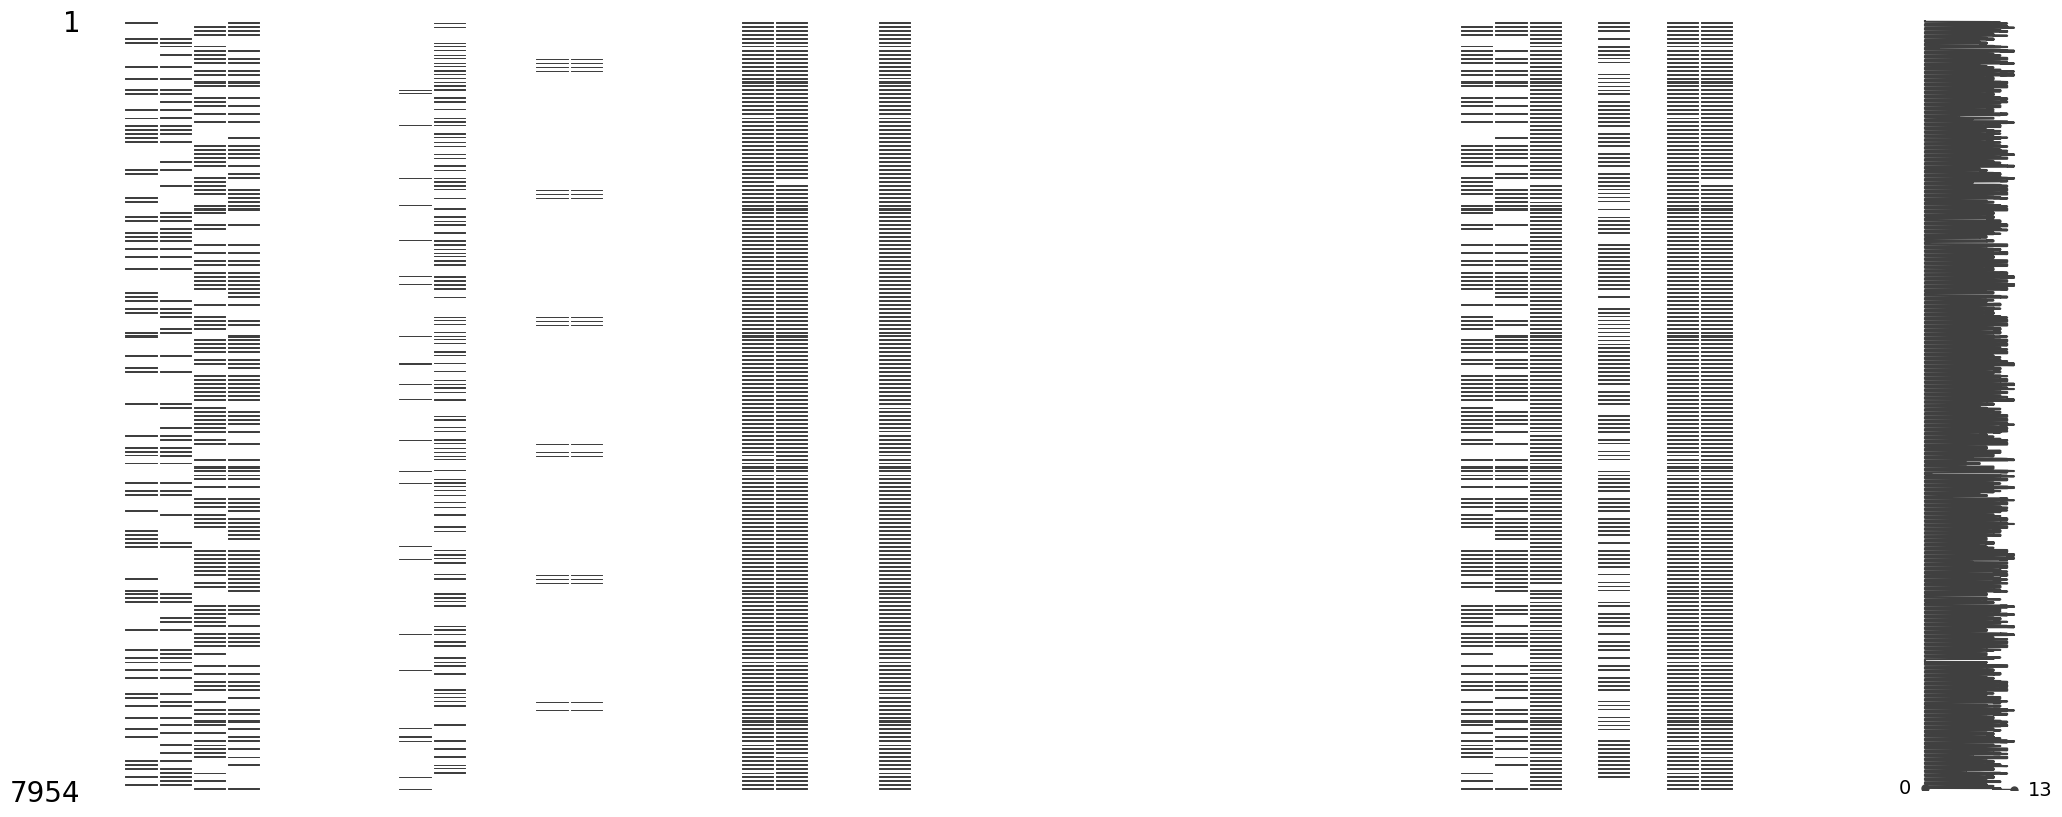

In [68]:
import missingno as msno

msno.matrix(country.loc[country.disagg_value.isna(), 'anaemia':'whole grains'])
plt.show()

In [69]:
country.loc[country.disagg_value.isna(), 'anaemia':'whole grains'].shape

(7954, 51)

In [70]:
country.loc[country.disagg_value.isna(), 'anaemia':'whole grains'].isnull().sum().sort_values(ascending=True)

metric
unimproved water               3955
limited water                  3955
limited sanitation             3964
unimproved sanitation          3964
open defecation                4005
surface water                  4041
undernourishment prev          5254
basic sanitation               5439
safely managed sanitation      5439
basic water                    5531
safely managed water           5531
female secondary enroll net    6208
at least basic water           6378
at least basic sanitation      6479
early childbearing prev        7623
gender inequality rank         7793
gender inequality              7793
risk factor ssbs               7954
risk factor red meat           7954
risk factor prc meat           7954
risk factor underweight        7954
risk factor vegetables         7954
anaemia                        7954
risk factor whole grains       7954
risk factor overweight         7954
thinness                       7954
underweight                    7954
vegetables           

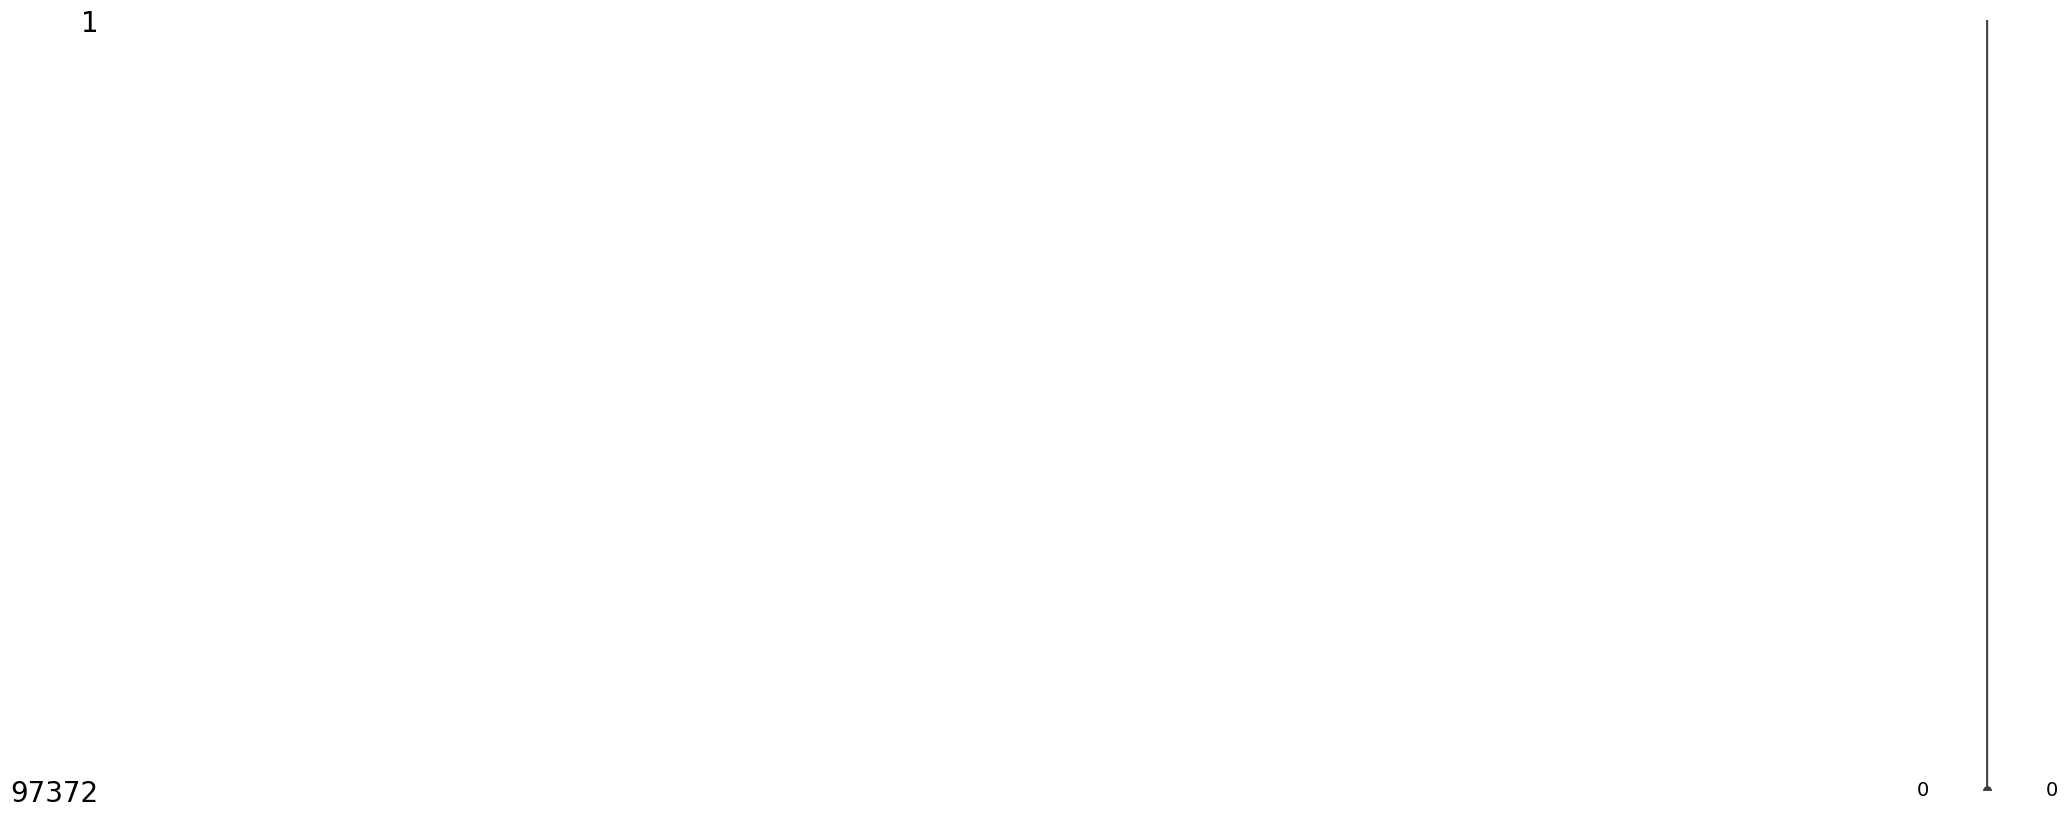

In [71]:
filtered = country.loc[:, 'anaemia':'whole grains']

msno.matrix(filtered.loc[filtered.isnull().all(axis=1)])
plt.show()

We'll drop these values by their index:

In [72]:
# drop_index = filtered.loc[filtered.isnull().all(axis=1)].index

# country = country.drop(index=drop_index)

Test for missing values:

In [73]:
for col in country.columns:
    print(f'{col}: {country[col].isnull().sum()}')

country: 0
disaggregation: 0
disagg_value: 7954
region: 0
subregion: 0
section: 0
year: 0
person_type: 0
anaemia: 123014
at least basic sanitation: 132681
at least basic water: 132580
basic sanitation: 131641
basic water: 131733
blood pressure: 127696
dairy: 133973
diabetes: 128076
diarrhea zinc: 132310
early childbearing prev: 133825
female secondary enroll net: 132410
fish: 133973
fruit: 133973
gender inequality: 133995
gender inequality rank: 133995
iodised salt: 131521
iron supp: 132707
iron tablets: 131469
legumes: 133973
limited sanitation: 130166
limited water: 130157
nuts: 133973
obesity: 120440
open defecation: 130207
overweight: 120820
red meat: 133973
risk factor all-rf: 133058
risk factor diet: 133241
risk factor fruits: 133432
risk factor legumes: 133798
risk factor nuts seeds: 133828
risk factor obese: 133058
risk factor overweight: 133058
risk factor prc meat: 133246
risk factor red meat: 133241
risk factor ssbs: 133613
risk factor underweight: 133085
risk factor vegetab

In [74]:
country.shape

(134156, 59)

In [75]:
country.loc[:, 'anaemia':'whole grains'].isnull().sum()

metric
anaemia                        123014
at least basic sanitation      132681
at least basic water           132580
basic sanitation               131641
basic water                    131733
blood pressure                 127696
dairy                          133973
diabetes                       128076
diarrhea zinc                  132310
early childbearing prev        133825
female secondary enroll net    132410
fish                           133973
fruit                          133973
gender inequality              133995
gender inequality rank         133995
iodised salt                   131521
iron supp                      132707
iron tablets                   131469
legumes                        133973
limited sanitation             130166
limited water                  130157
nuts                           133973
obesity                        120440
open defecation                130207
overweight                     120820
red meat                       133973
risk 

In [76]:
country.loc[:, 'anaemia':'whole grains'].shape

(134156, 51)

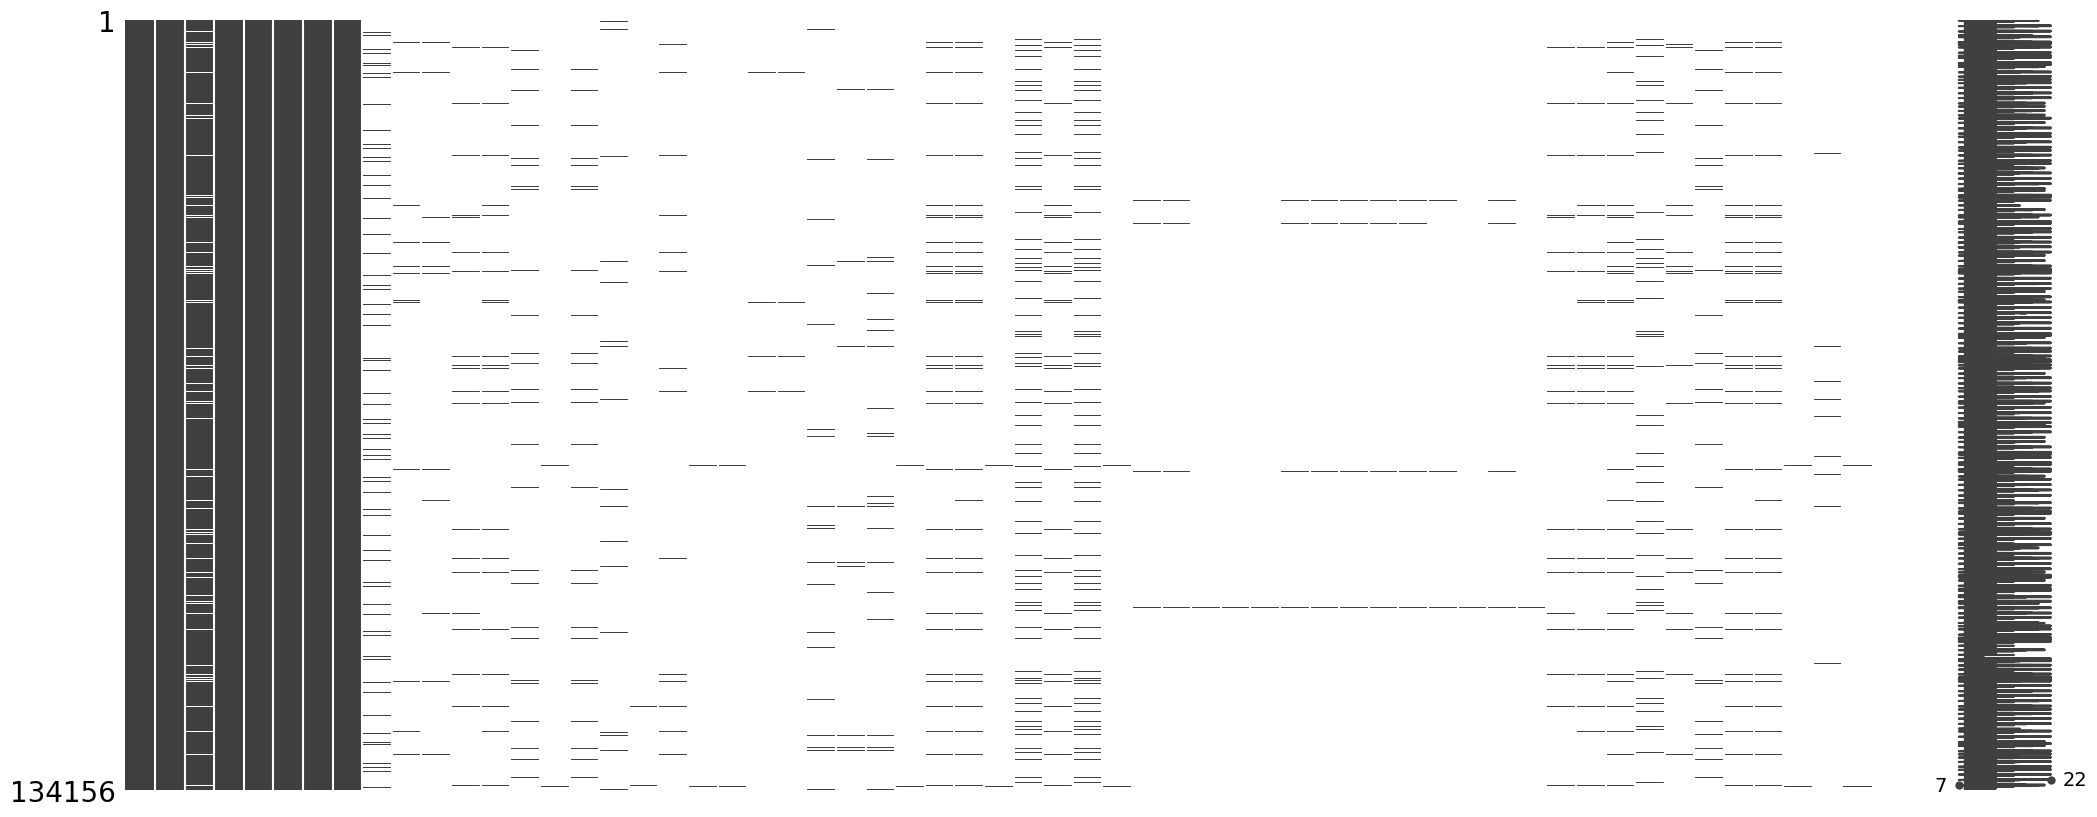

In [77]:
msno.matrix(country)
plt.show()

In [78]:
country.isnull().sum()

metric
country                             0
disaggregation                      0
disagg_value                     7954
region                              0
subregion                           0
section                             0
year                                0
person_type                         0
anaemia                        123014
at least basic sanitation      132681
at least basic water           132580
basic sanitation               131641
basic water                    131733
blood pressure                 127696
dairy                          133973
diabetes                       128076
diarrhea zinc                  132310
early childbearing prev        133825
female secondary enroll net    132410
fish                           133973
fruit                          133973
gender inequality              133995
gender inequality rank         133995
iodised salt                   131521
iron supp                      132707
iron tablets                   131469
legum

There are no duplicate records:

In [79]:
country.duplicated().sum()

0

### Exploratory Data Analysis

**Obesity**

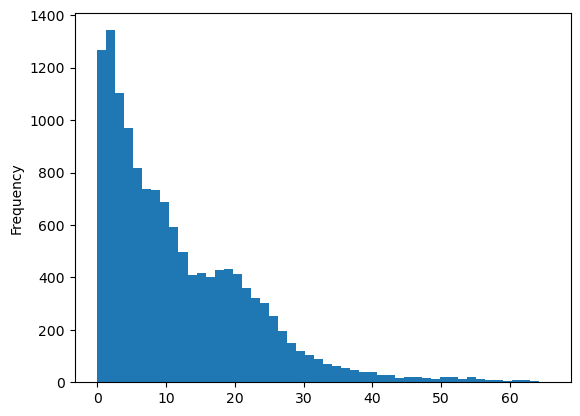

In [80]:
country.obesity.plot(
    kind='hist', bins=50
)
plt.show()

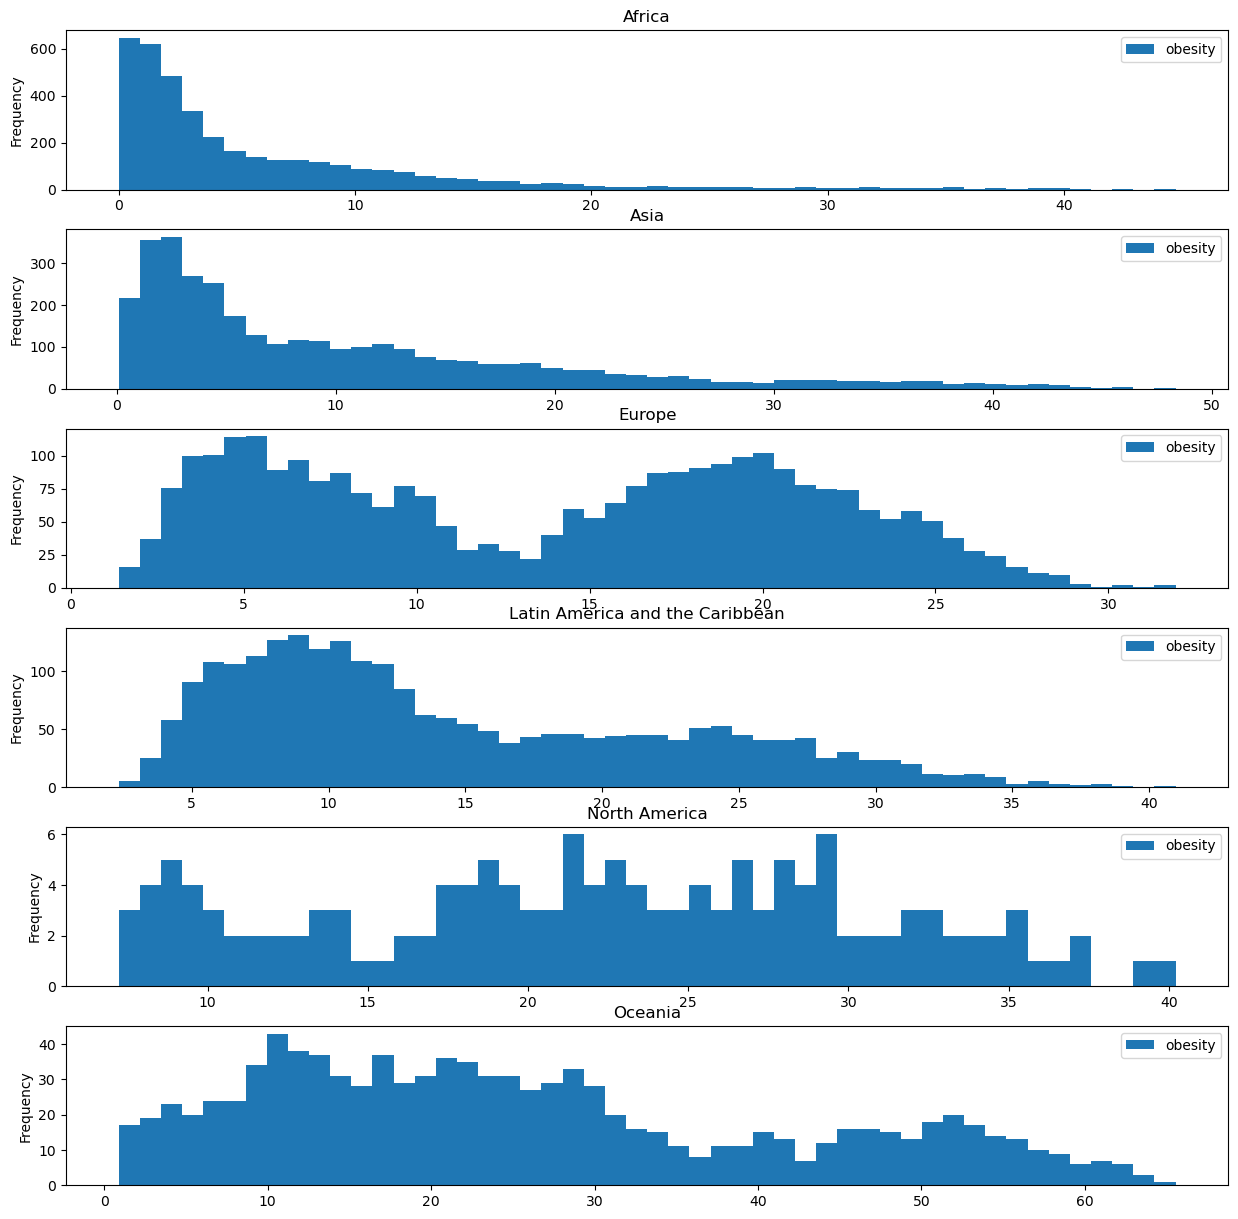

In [81]:
country.plot(
    column=['obesity'], kind='hist', bins=50, by='region', figsize=(15, 15)
)
plt.subplots_adjust(hspace=.25)
plt.show()

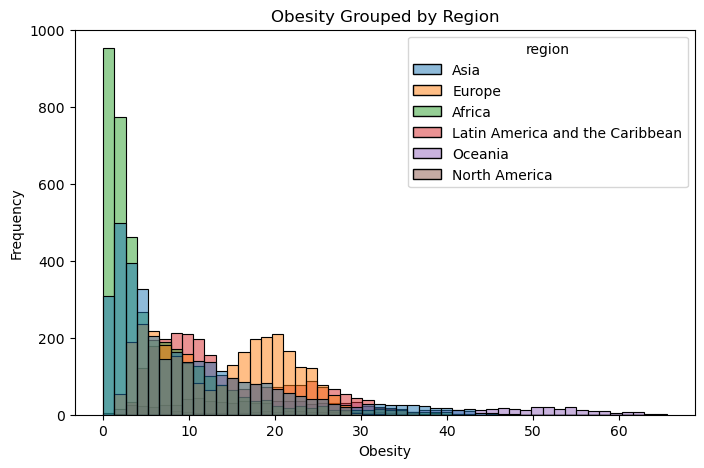

In [82]:
plt.figure(figsize=(8, 5))

sns.histplot(
    data=country, x='obesity', hue='region', bins=50, common_norm=False,
)

plt.title('Obesity Grouped by Region')
plt.xlabel('Obesity')
plt.ylabel('Frequency')

plt.show()

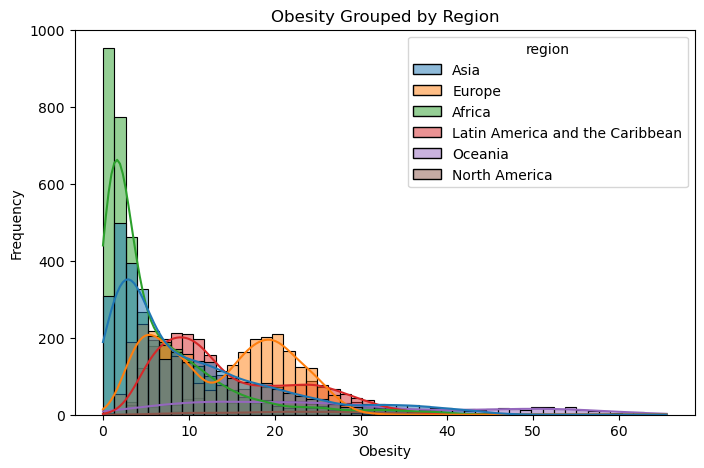

In [83]:
plt.figure(figsize=(8, 5))

sns.histplot(
    data=country, x='obesity', hue='region', bins=50, kde=True, common_norm=False,
)

plt.title('Obesity Grouped by Region')
plt.xlabel('Obesity')
plt.ylabel('Frequency')

plt.show()

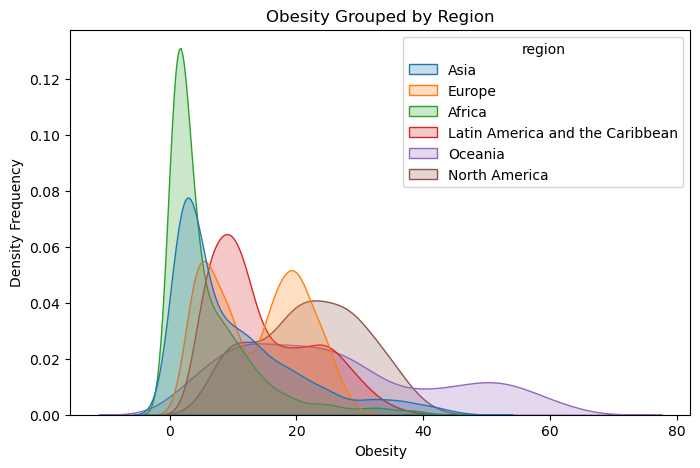

In [84]:
plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=country, x='obesity', hue='region', fill=True, common_norm=False,
)

plt.title('Obesity Grouped by Region')
plt.xlabel('Obesity')
plt.ylabel('Density Frequency')

plt.show()

In [85]:
country.loc[country.region=='Oceania'].country.unique()

array(['Australia', 'Fiji', 'Kiribati', 'Marshall Islands',
       'Micronesia (Federated States of)', 'Nauru', 'New Zealand',
       'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga',
       'Tuvalu', 'Vanuatu'], dtype=object)

When averaged by year, Obesity is increasing across all regions:

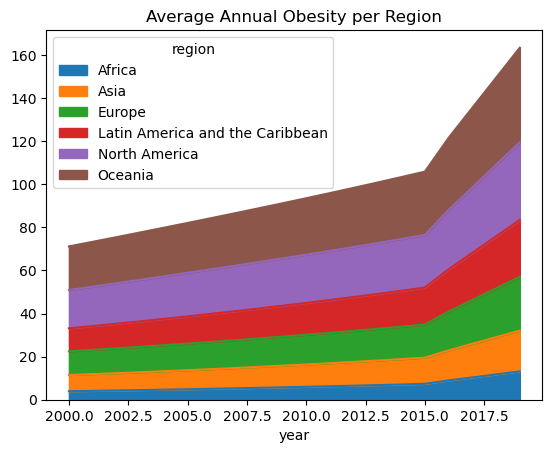

In [86]:
country.pivot_table(
    index='year', columns='region', values='obesity'
).plot.area()
plt.title('Average Annual Obesity per Region')
plt.show()

Obesity is more common in adults than adolescents and the range is wider in adults than adolescents:

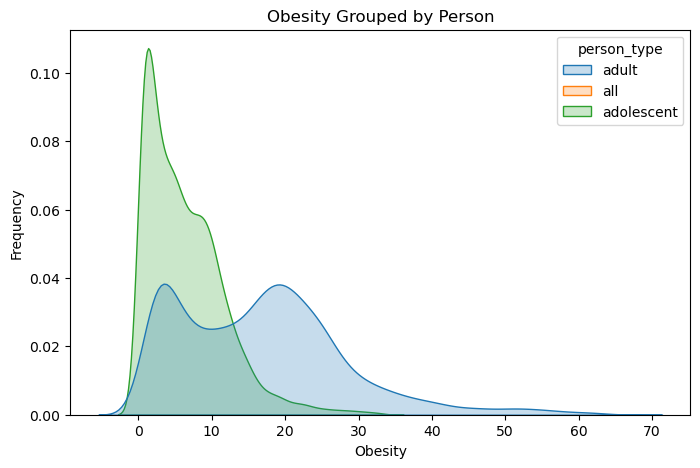

In [87]:
plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=country, x='obesity', hue='person_type', fill='True', common_norm=False,
)

plt.title('Obesity Grouped by Person')
plt.xlabel('Obesity')
plt.ylabel('Frequency')

plt.show()

For adolescents, the spread of obesity s similar to the full dataset spread:

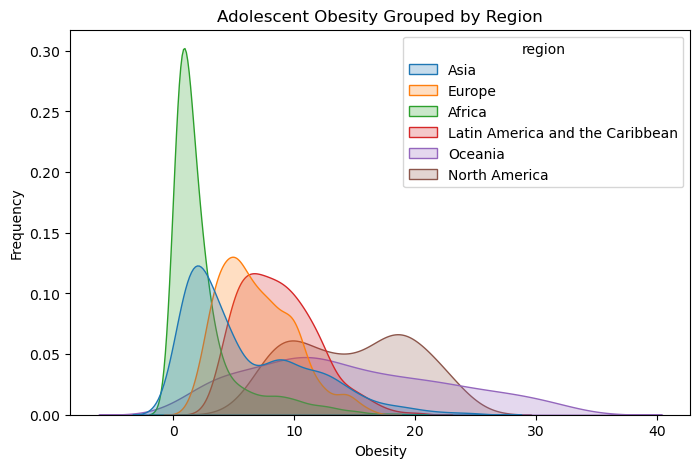

In [88]:
plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=country.query('person_type=="adolescent"'), x='obesity', hue='region', fill='True', common_norm=False,
)

plt.title('Adolescent Obesity Grouped by Region')
plt.xlabel('Obesity')
plt.ylabel('Frequency')

plt.show()

For adults, obesity levels are higher across all ranges:

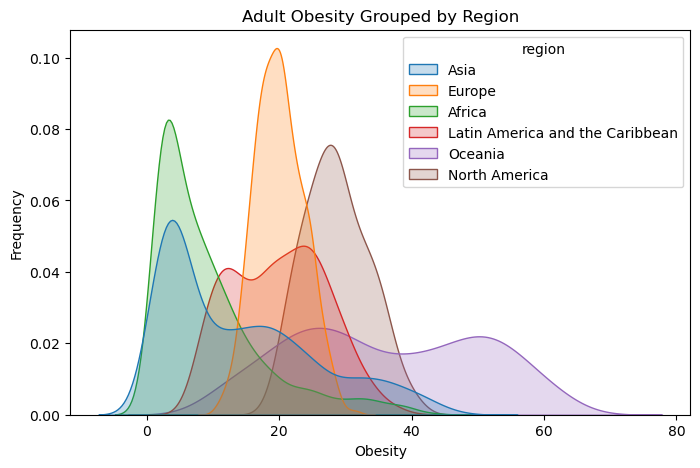

In [89]:
plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=country.query('person_type=="adult"'), x='obesity', hue='region', fill='True', common_norm=False,
)

plt.title('Adult Obesity Grouped by Region')
plt.xlabel('Obesity')
plt.ylabel('Frequency')

plt.show()

Top 5 obese countries on average are in Oceania. This confirms the plots above.

In [90]:
country.groupby(by='country').agg({'obesity':np.mean}).sort_values(by='obesity', ascending=False).iloc[:10]

metric,obesity
country,
Nauru,44.328194
Palau,38.438750
Marshall Islands,35.390139
Tuvalu,33.539722
Tonga,31.629306
Kiribati,29.494583
Samoa,29.359861
Kuwait,28.644861
Micronesia (Federated States of),28.057361


When grouped by year, the trends of recent obesity show that Oceania still leads the regions on high obesity rates.

In [91]:
country.pivot_table(
    index=['year', 'region', 'country'], values='obesity'
).sort_values(by='obesity', ascending=False).head()

metric                             obesity
year   region  country                    
2019.0 Oceania Nauru             63.460000
               Palau             58.930000
               Marshall Islands  56.275000
               Tuvalu            55.685000
2016.0 Oceania Nauru             51.768333

The relationship between obesity and other attributes:

In [92]:
country[['anaemia', 'obesity', 'year']].isnull().sum()

metric
anaemia    123014
obesity    120440
year            0
dtype: int64

There's no interaction between anaemia and obesity in our dataset.

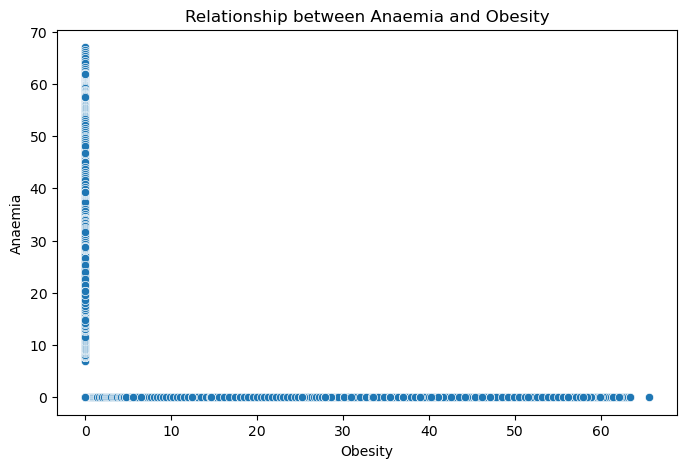

In [93]:
plt.figure(figsize=(8, 5))
# df = country[['anaemia', 'obesity']].dropna(how='all')
sns.scatterplot(data=country.fillna(0), x='obesity', y='anaemia')

plt.title('Relationship between Anaemia and Obesity')
plt.xlabel('Obesity')
plt.ylabel('Anaemia')

plt.show()

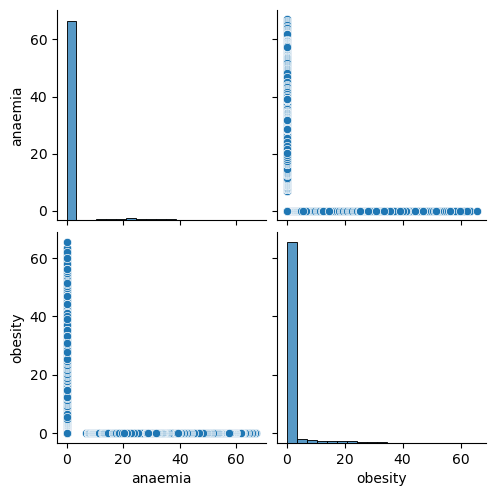

In [101]:
sns.pairplot(country[['anaemia', 'obesity']].fillna(0))
plt.show()

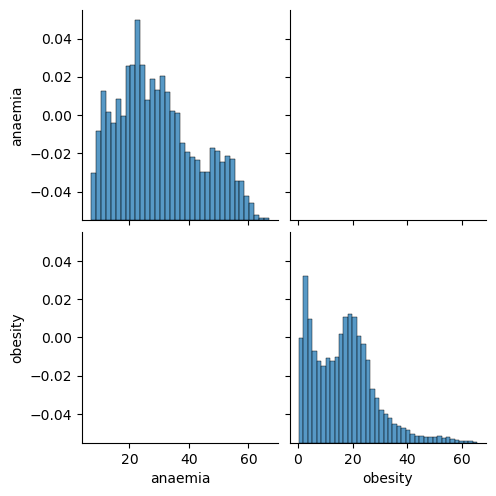

In [98]:
sns.pairplot(
    country.query('person_type=="adult"')[['anaemia', 'obesity']]
    )
plt.show()

In [108]:
for year in range(2000, 2020):
    print(year)
    print(country.loc[(country.year==year ) & (country.person_type=='adult'), ['anaemia', 'obesity']].isnull().sum())
    print(country.loc[(country.year==year ) & (country.person_type=='adult'), ['anaemia', 'obesity']].shape)
    print('*'*10)

2000
metric
anaemia    3710
obesity    3888
dtype: int64
(4268, 2)
**********
2001
metric
anaemia    3710
obesity    3888
dtype: int64
(4268, 2)
**********
2002
metric
anaemia    3710
obesity    3888
dtype: int64
(4268, 2)
**********
2003
metric
anaemia    3710
obesity    3888
dtype: int64
(4268, 2)
**********
2004
metric
anaemia    3710
obesity    3888
dtype: int64
(4268, 2)
**********
2005
metric
anaemia    3710
obesity    3888
dtype: int64
(4268, 2)
**********
2006
metric
anaemia    3710
obesity    3888
dtype: int64
(4268, 2)
**********
2007
metric
anaemia    3710
obesity    3888
dtype: int64
(4268, 2)
**********
2008
metric
anaemia    3710
obesity    3888
dtype: int64
(4268, 2)
**********
2009
metric
anaemia    3710
obesity    3888
dtype: int64
(4268, 2)
**********
2010
metric
anaemia    3710
obesity    3888
dtype: int64
(4268, 2)
**********
2011
metric
anaemia    3710
obesity    3888
dtype: int64
(4268, 2)
**********
2012
metric
anaemia    3710
obesity    3888
dtype: int64
(4268, 

<Axes: xlabel='obesity', ylabel='anaemia'>

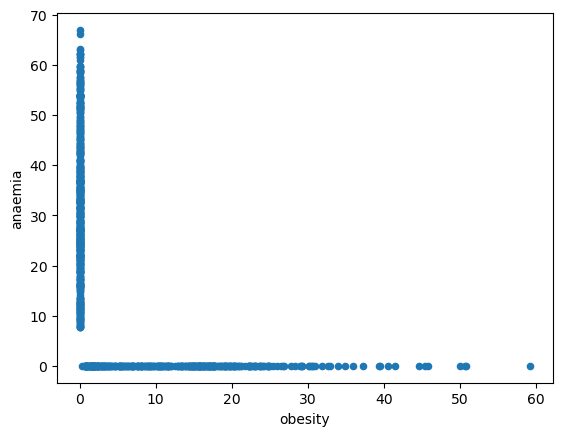

In [113]:
country.loc[(country.year==2000 ) & (country.person_type=='adult'), ['anaemia', 'obesity']].dropna(how='all').fillna(0).plot(
    kind='scatter', x='obesity', y='anaemia'
)

The interaction between obesity and blood pressure:

In [121]:
country.blood_pressure.unique()

array([  nan, 28.64, 28.84, ..., 15.7 , 14.37, 31.1 ])

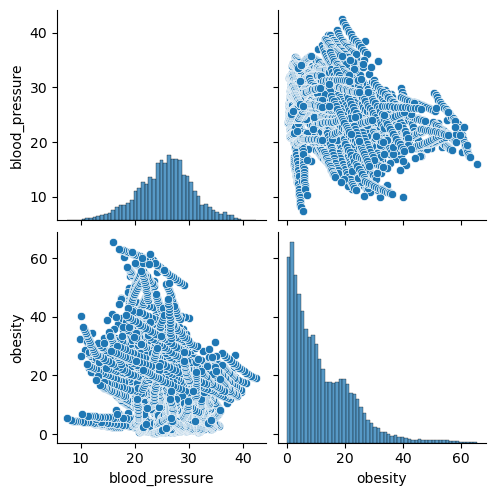

In [116]:
sns.pairplot(country[['blood_pressure', 'obesity']])
plt.show()

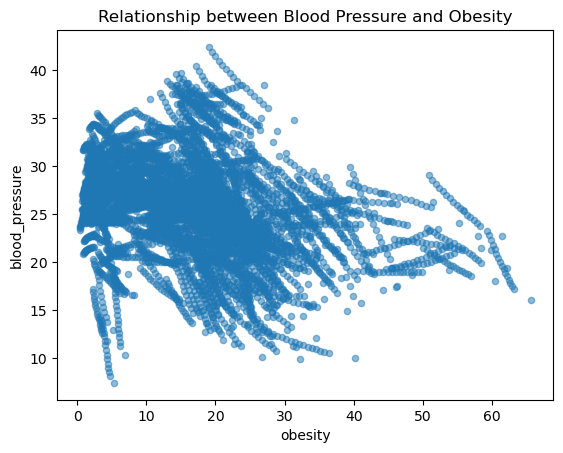

In [129]:
country.loc[:, ['obesity', 'blood_pressure']].dropna(how='all').plot(
    kind='scatter', x='obesity', y='blood_pressure', alpha=.5
)
plt.title('Relationship between Blood Pressure and Obesity')
plt.show()

When segmented by region, Europe has the highest blood pressure values with median obesity values. Oceania, with the highest obesity values does not feature too highly on the blood pressure chart.

This implies that there is no clear relationship between blood pressure and obesity.

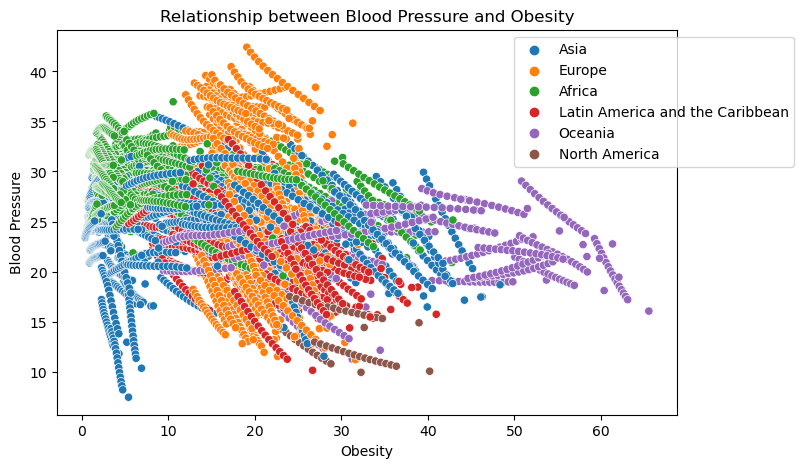

In [127]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=country, x='obesity', y='blood_pressure', hue='region',
    )

plt.title('Relationship between Blood Pressure and Obesity')
plt.xlabel('Obesity')
plt.ylabel('Blood Pressure')

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Let's test this thesis:
* There is a negative linear correlation between both variables.
* Using the Mann-whitney U test, there is clearly a statistically significant difference between both variables. 

In [139]:
country[['obesity', 'blood_pressure']].corr()

metric,obesity,blood_pressure
metric,,
obesity,1.000000,-0.319203
blood_pressure,-0.319203,1.000000


In [141]:
u_stat, p_value = stats.mannwhitneyu(country.obesity.fillna(0), country.blood_pressure.fillna(0))
print(f'U stat: {u_stat:,.2f}')
print(f'p-value: {p_value:,.2f}')

U stat: 9,449,432,079.50
p-value: 0.00


Let's measure the effet size of the difference between the 2 variables:

In [148]:
from cliffs_delta import cliffs_delta

effect_size, result = cliffs_delta(country.obesity.fillna(0), country.blood_pressure.fillna(0))

if effect_size < 0.147:
    interpretation = "Small Effect"
elif 0.147 <= effect_size < 0.33:
    interpretation = "Medium Effect"
elif effect_size >= 0.33:
    interpretation = "Large Effect"
else:
    interpretation = "No Effect"

print(f"Cliff's Delta (d): {effect_size}")
print(f"Interpretation: {interpretation}")


Cliff's Delta (d): 0.05006335241815312
Interpretation: Small Effect


In [149]:
result

'negligible'

Using violin plot to visualize the distribution of the two variables and gain a clear indication of the direction of the difference:

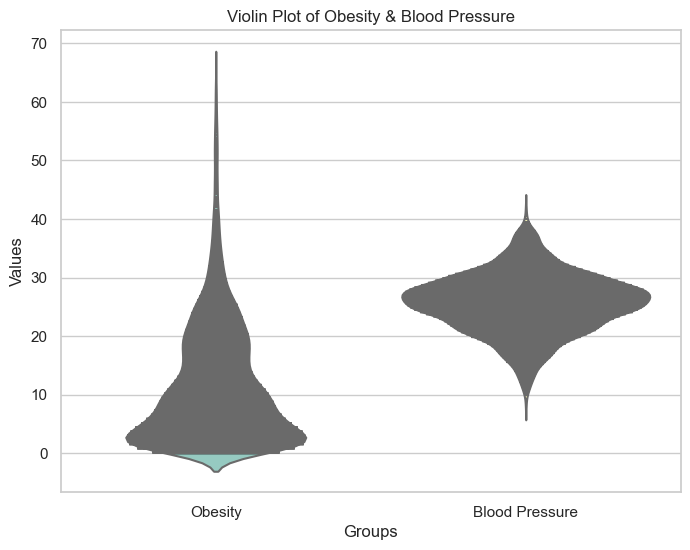

In [157]:
plt.figure(figsize=(8, 6))
data = pd.DataFrame({'Obesity': country.obesity, 'Blood Pressure': country.blood_pressure})
sns.set(style="whitegrid")
sns.violinplot(
    data=data, inner="stick", palette="Set3"
    )

plt.xlabel('Groups')
plt.ylabel('Values')
plt.title('Violin Plot of Obesity & Blood Pressure')

plt.show()

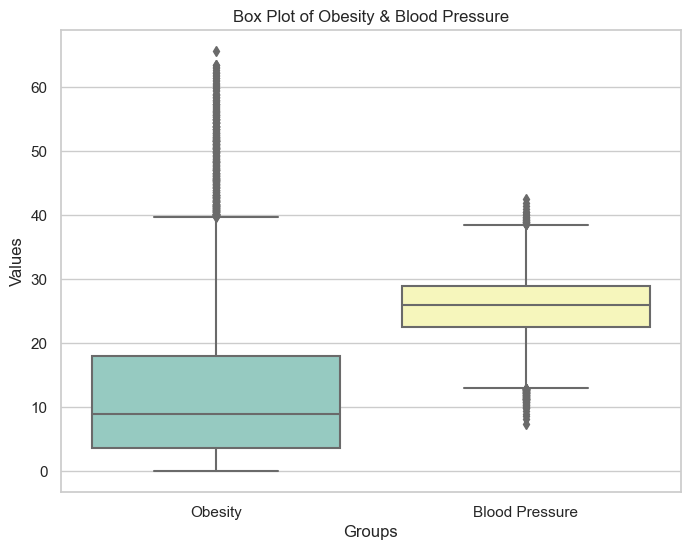

In [155]:
plt.figure(figsize=(8, 6))
data = pd.DataFrame({'Obesity': country.obesity, 'Blood Pressure': country.blood_pressure})
sns.set(style="whitegrid")
sns.boxplot(
    data=data, palette="Set3"
    )

plt.xlabel('Groups')
plt.ylabel('Values')
plt.title('Box Plot of Obesity & Blood Pressure')

plt.show()

ANOVA:

In [144]:
# Combine the two variables into a single data structure
all_data = [country.obesity.fillna(0), country.blood_pressure.fillna(0)]

# Create a grouping variable to distinguish between the two groups
group_labels = ['Obesity'] * len(country.obesity.fillna(0)) + ['blood_pressure'] * len(country.blood_pressure.fillna(0))

# Perform a one-way ANOVA
f_stat, p_value = stats.f_oneway(*all_data)

print(f'F-statistic: {f_stat}')
print(f'p-value: {p_value}')

F-statistic: 1.5576994249350051
p-value: 0.21200347600041222


Descriptive Stats:

In [158]:
country[['obesity', 'blood_pressure']].describe()

metric,obesity,blood_pressure
count,13716.000000,6460.000000
mean,11.852998,25.694068
std,10.456732,5.082753
min,0.000000,7.440000
25%,3.580000,22.520000
50%,8.960000,25.965000
75%,18.022500,28.932500
max,65.560000,42.420000


When using independent t-test, the t stat and p-value is poor because this important assumption does not apply to our feature: _The data in each group is approximately normally distributed, and variances are approximately equal._

In [143]:
t_stat, p_value = stats.ttest_ind(country.obesity.fillna(0), country.blood_pressure.fillna(0))
print(f'T stat: {t_stat:,.2f}')
print(f'p-value: {p_value:,.2f}')

T stat: -1.25
p-value: 0.21


The interaction between obesity and diabetes:

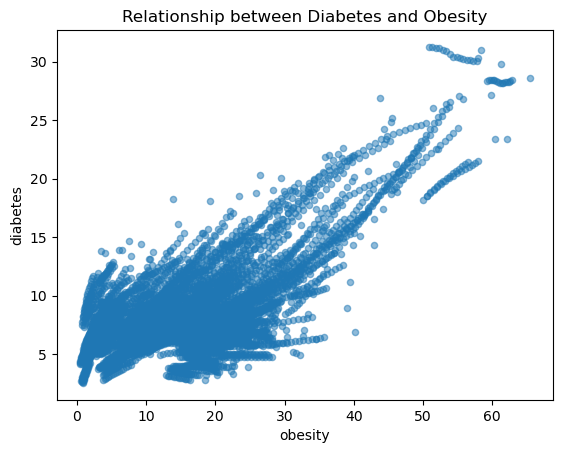

In [130]:
country.loc[:, ['obesity', 'diabetes']].dropna(how='all').plot(
    kind='scatter', x='obesity', y='diabetes', alpha=.5
)
plt.title('Relationship between Diabetes and Obesity')
plt.show()

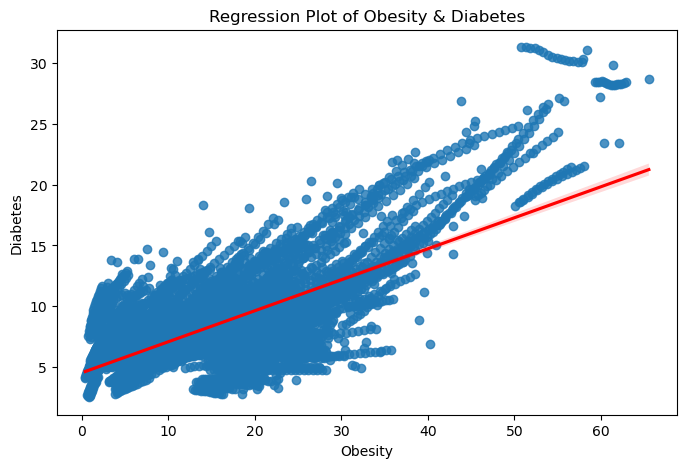

In [132]:
plt.figure(figsize=(8, 5))
sns.regplot(
    data=country, x='obesity', y='diabetes', line_kws={'color':'red'}
    )

plt.title('Regression Plot of Obesity & Diabetes')
plt.xlabel('Obesity')
plt.ylabel('Diabetes')

plt.show()

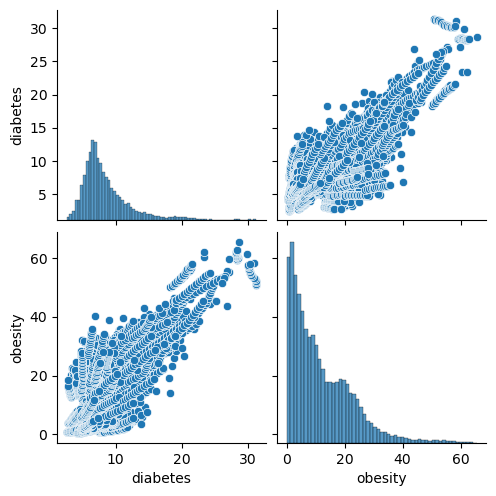

In [133]:
sns.pairplot(country[['diabetes', 'obesity']])
plt.show()

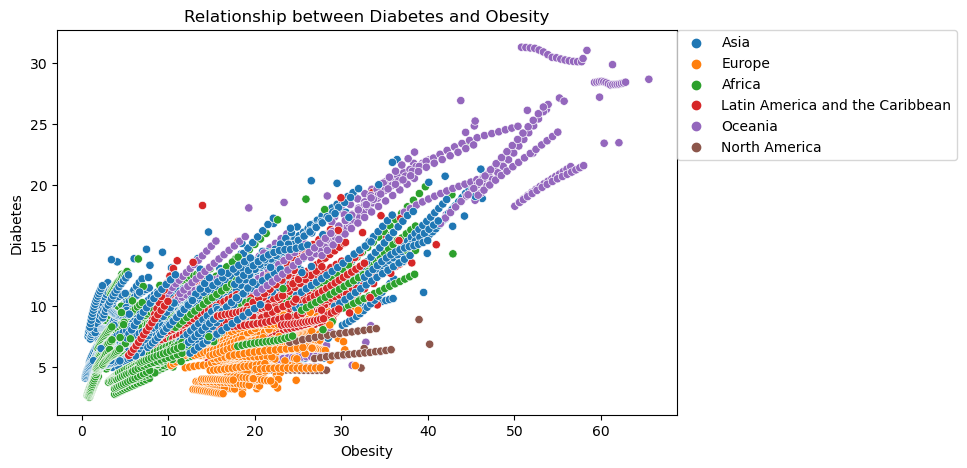

In [137]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=country, x='obesity', y='diabetes', hue='region',
    )

plt.title('Relationship between Diabetes and Obesity')
plt.xlabel('Obesity')
plt.ylabel('Diabetes')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.0)
plt.show()

In [159]:
country[['obesity', 'diabetes']].corr()

metric,obesity,diabetes
metric,,
obesity,1.000000,0.699547
diabetes,0.699547,1.000000


In [160]:
t_stat, p_value = stats.ttest_ind(country.obesity.fillna(0), country.diabetes.fillna(0))
print(f'T stat: {t_stat:,.2f}')
print(f'p-value: {p_value:,.2f}')

T stat: 56.50
p-value: 0.00


In [161]:
u_stat, p_value = stats.mannwhitneyu(country.obesity.fillna(0), country.diabetes.fillna(0))
print(f'U stat: {u_stat:,.2f}')
print(f'p-value: {p_value:,.2f}')

U stat: 9,511,220,646.00
p-value: 0.00


Cliff's Delta:

In [163]:
effect_size, result = cliffs_delta(country.obesity.fillna(0), country.diabetes.fillna(0))

if effect_size < 0.147:
    interpretation = "Small Effect"
elif 0.147 <= effect_size < 0.33:
    interpretation = "Medium Effect"
elif effect_size >= 0.33:
    interpretation = "Large Effect"
else:
    interpretation = "No Effect"

print(f"Cliff's Delta (d): {effect_size}")
print(f"Interpretation: {interpretation}")
print(result)

Cliff's Delta (d): 0.056929575566193893
Interpretation: Small Effect
negligible


Cohen's D:

In [167]:
group1 = country.obesity
group2 = country.diabetes

mean_group1 = np.mean(group1)
mean_group2 = np.mean(group2)
std_group1 = np.std(group1, ddof=1)
std_group2 = np.std(group2, ddof=1)

# Calculate Cohen's d
pooled_std = np.sqrt(((len(group1) - 1) * std_group1**2 + (len(group2) - 1) * std_group2**2) / (len(group1) + len(group2) - 2))
cohens_d = (mean_group1 - mean_group2) / pooled_std

if cohens_d < 0.2:
    interpretation = "Small Effect"
elif 0.2 <= cohens_d < 0.5:
    interpretation = "Medium Effect"
elif cohens_d >= 0.5:
    interpretation = "Large Effect"
else:
    interpretation = "No Effect"

print(f"Cohen's D (d): {cohens_d}")
print(f"Interpretation: {interpretation}")

Cohen's D (d): 0.3976924980368972
Interpretation: Medium Effect


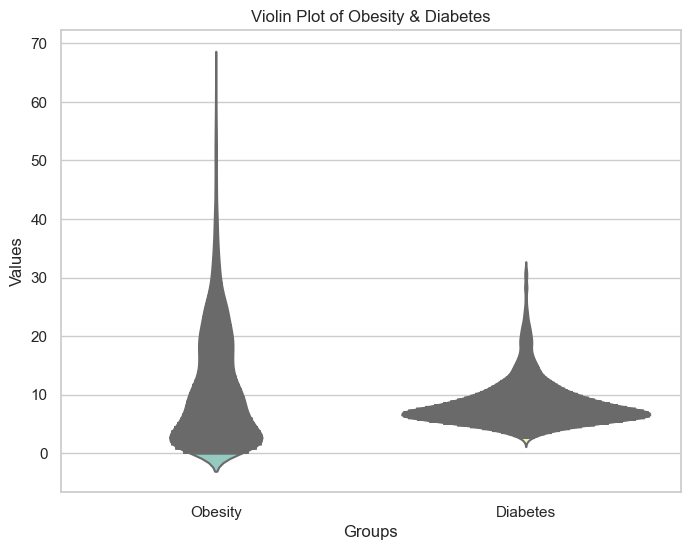

In [168]:
plt.figure(figsize=(8, 6))
data = pd.DataFrame({'Obesity': country.obesity, 'Diabetes': country.diabetes})
sns.set(style="whitegrid")
sns.violinplot(
    data=data, inner="stick", palette="Set3"
    )

plt.xlabel('Groups')
plt.ylabel('Values')
plt.title('Violin Plot of Obesity & Diabetes')

plt.show()

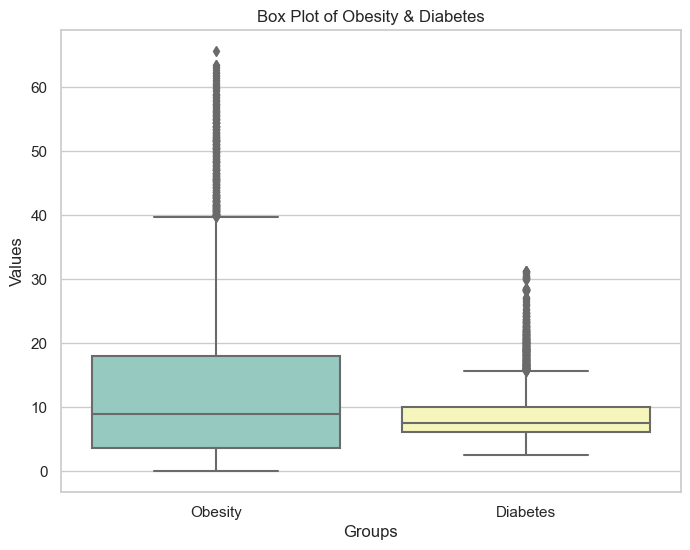

In [170]:
plt.figure(figsize=(8, 6))
data = pd.DataFrame({'Obesity': country.obesity, 'Diabetes': country.diabetes})
sns.set(style="whitegrid")
sns.boxplot(
    data=data, palette="Set3"
    )

plt.xlabel('Groups')
plt.ylabel('Values')
plt.title('Box Plot of Obesity & Diabetes')

plt.show()

ANOVA:

In [171]:
# Combine the two variables into a single data structure
all_data = [country.obesity.fillna(0), country.diabetes.fillna(0)]

# Create a grouping variable to distinguish between the two groups
group_labels = ['Obesity'] * len(country.obesity.fillna(0)) + ['Diabetes'] * len(country.diabetes.fillna(0))

# Perform a one-way ANOVA
f_stat, p_value = stats.f_oneway(*all_data)

print(f'F-statistic: {f_stat}')
print(f'p-value: {p_value}')

F-statistic: 3192.2910776052427
p-value: 0.0


**Overweight**

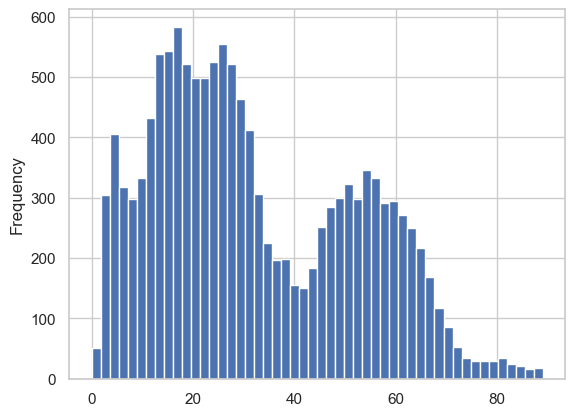

In [175]:
country.overweight.plot(
    kind='hist', bins=50
)
plt.show()

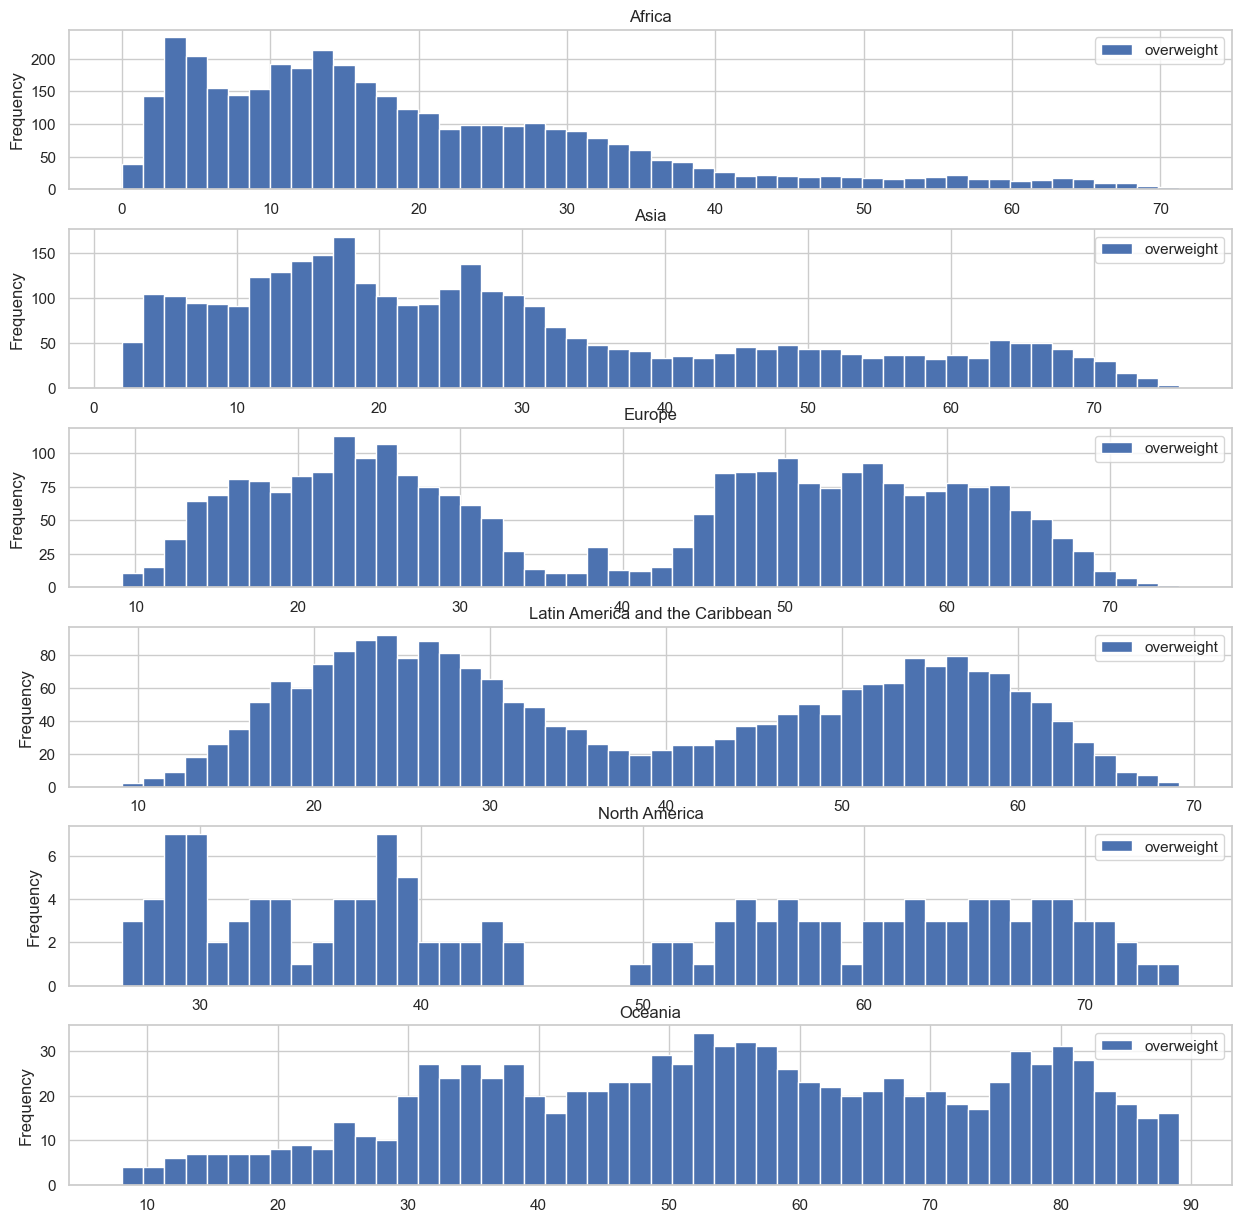

In [176]:
country.plot(
    column=['overweight'], kind='hist', bins=50, by='region', figsize=(15, 15)
)
plt.subplots_adjust(hspace=.25)
plt.show()

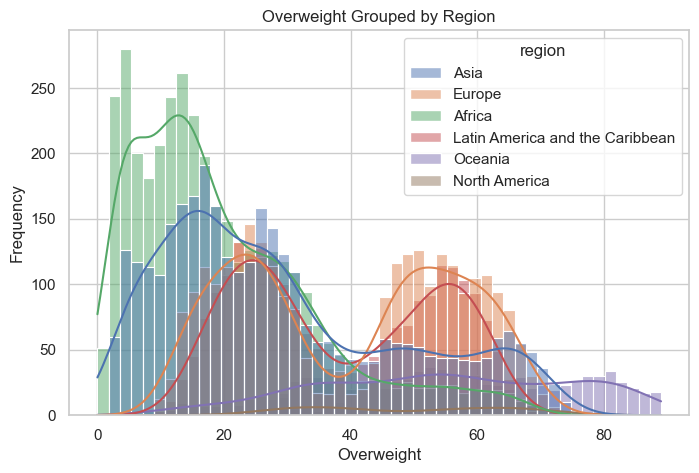

In [177]:
plt.figure(figsize=(8, 5))

sns.histplot(
    data=country, x='overweight', hue='region', bins=50, kde=True, common_norm=False,
)

plt.title('Overweight Grouped by Region')
plt.xlabel('Overweight')
plt.ylabel('Frequency')

# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.0)
plt.show()

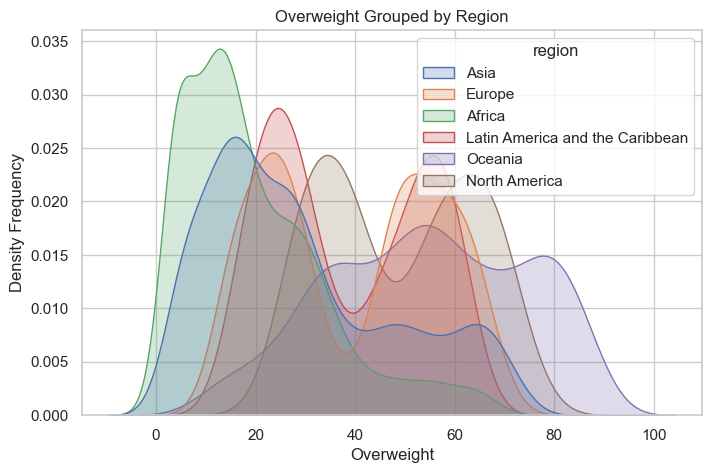

In [183]:
plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=country, x='overweight', hue='region', fill=True, common_norm=False,
)

plt.title('Overweight Grouped by Region')
plt.xlabel('Overweight')
plt.ylabel('Density Frequency')

# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.0)
plt.show()

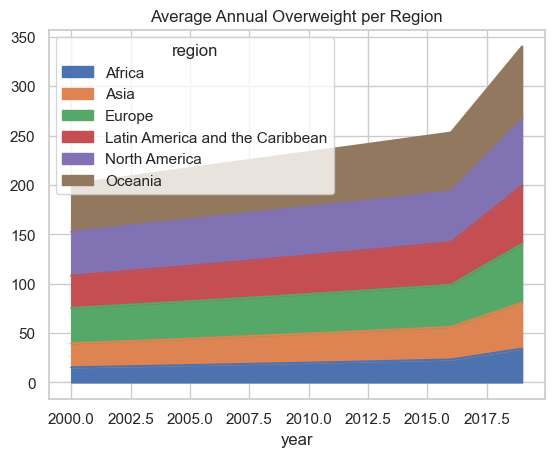

In [179]:
country.pivot_table(
    index='year', columns='region', values='overweight'
).plot.area()
plt.title('Average Annual Overweight per Region')

# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.0)
plt.show()

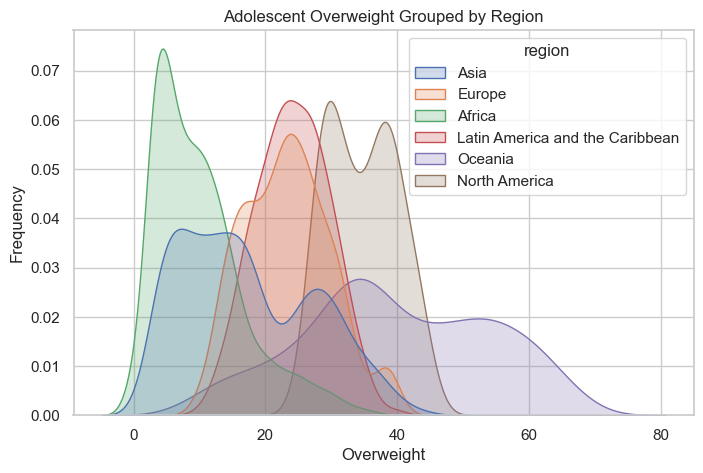

In [180]:
plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=country.query('person_type=="adolescent"'), x='overweight', hue='region', fill='True', common_norm=False,
)

plt.title('Adolescent Overweight Grouped by Region')
plt.xlabel('Overweight')
plt.ylabel('Frequency')

# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.0)
plt.show()

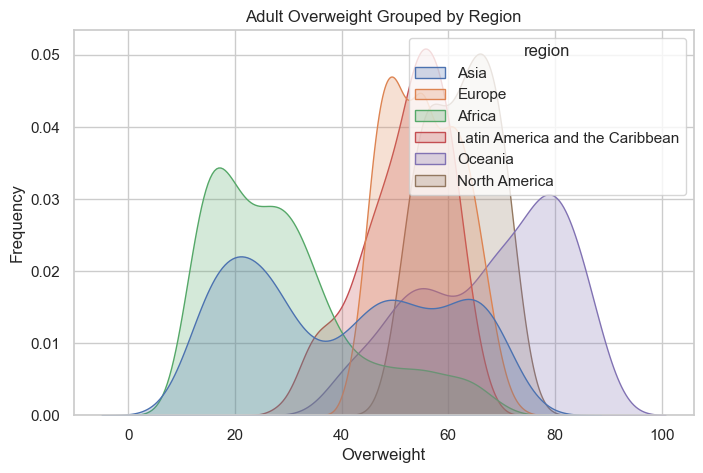

In [185]:
plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=country.query('person_type=="adult"'), x='overweight', hue='region', fill='True', common_norm=False,
)

plt.title('Adult Overweight Grouped by Region')
plt.xlabel('Overweight')
plt.ylabel('Frequency')

# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.0)
plt.show()

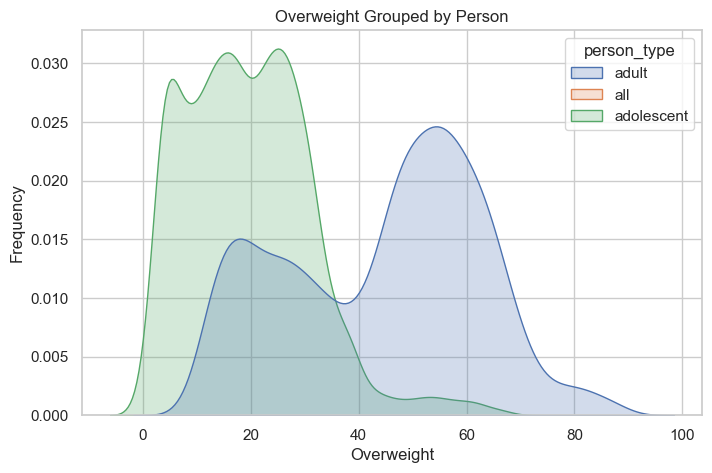

In [187]:
plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=country, x='overweight', hue='person_type', fill='True', common_norm=False,
)

plt.title('Overweight Grouped by Person')
plt.xlabel('Overweight')
plt.ylabel('Frequency')

# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.0)
plt.show()

**Underweight**

**Thinness**

In [97]:
country_adolescent.metric.unique()

array(['obesity', 'overweight', 'thinness'], dtype=object)